In [125]:
args_pre = {
    'det_config': 'demo/mmdetection_cfg/faster_rcnn_r50_fpn_coco.py',
    'det_checkpoint': 'https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth',
    'pose_detector_config': 'configs/body/2d_kpt_sview_rgb_img/topdown_heatmap/coco/hrnet_w48_coco_256x192.py',
    'pose_detector_checkpoint': 'https://download.openmmlab.com/mmpose/top_down/hrnet/hrnet_w48_coco_256x192-b9e0b3ab_20200708.pth',
    'pose_lifter_config': 'configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/videopose3d_h36m_243frames_fullconv_supervised_cpn_ft.py',
    'pose_lifter_checkpoint': 'https://download.openmmlab.com/mmpose/body3d/videopose/videopose_h36m_243frames_fullconv_supervised_cpn_ft-88f5abbb_20210527.pth',
    # Flags/Optional
#     'video_path': 'demo/resources/jeldwen-1.mp4',
    'rebase_keypoint_height': True,
    'norm_pose_2d': None,
    'num_instances': -1,
    'show': False,
    'out_video_root': 'vis_results',
    'device': 'cuda:0',
    'det_cat_id': 1,
    'bbox_thr': 0.9,
    'kpt_thr': 0.3,
    'use_oks_tracking': None,
    'tracking_thr': 0.3,
    'euro': None,
    'radius': 8,
    'thickness': 2,
}
from types import SimpleNamespace
args = SimpleNamespace(**args_pre)

In [126]:
from demo import zach_v_body3d_two_stage_video as m_2d_3d_model 

In [127]:
# Test one video

args.video_name = 'gHO_sBM_c08_d20_mHO0_ch10'
args.file_path = 'demo/resources/evaluation_vids/gHO_sBM_c08_d20_mHO0_ch10.mp4'
# args.file_path = 'demo/resources/test_vids/gHO_sBM_c08_d20_mHO0_ch10.mp4'
m_2d_3d_model.process_video(args)

Stage #1: 2D pose detection.


/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_http loader
person_det_model-> FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=Tru

Use load_from_http loader
Initialized Model
Video len: 523


/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


Idx: 100
Idx: 200
Idx: 300
Idx: 400
Idx: 500
Stage 2: 2D-to-3D pose lifting.
Use load_from_http loader
[                                                  ] 0/523, elapsed: 0s, ETA:Len 243
[                                                  ] 1/523, 6.1 task/s, elapsed: 0s, ETA:    86sLen 243
[                                                  ] 2/523, 6.2 task/s, elapsed: 0s, ETA:    85sLen 243
[                                                  ] 3/523, 6.3 task/s, elapsed: 0s, ETA:    83sLen 243
[                                                  ] 4/523, 6.3 task/s, elapsed: 1s, ETA:    82sLen 243
[                                                  ] 5/523, 6.4 task/s, elapsed: 1s, ETA:    81sLen 243
[                                                  ] 6/523, 6.4 task/s, elapsed: 1s, ETA:    81sLen 243
[                                                  ] 7/523, 6.4 task/s, elapsed: 1s, ETA:    81sLen 243
[                                                  ] 8/523, 6.4 task/s, elapsed: 1s,

[>>>>>>>                                           ] 77/523, 6.3 task/s, elapsed: 12s, ETA:    71sLen 243
[>>>>>>>                                           ] 78/523, 6.4 task/s, elapsed: 12s, ETA:    70sLen 243
[>>>>>>>                                           ] 79/523, 6.4 task/s, elapsed: 12s, ETA:    70sLen 243
[>>>>>>>                                           ] 80/523, 6.4 task/s, elapsed: 12s, ETA:    69sLen 243
[>>>>>>>                                           ] 81/523, 6.4 task/s, elapsed: 13s, ETA:    69sLen 243
[>>>>>>>                                           ] 82/523, 6.5 task/s, elapsed: 13s, ETA:    68sLen 243
[>>>>>>>                                           ] 83/523, 6.5 task/s, elapsed: 13s, ETA:    68sLen 243
[>>>>>>>>                                          ] 84/523, 6.5 task/s, elapsed: 13s, ETA:    67sLen 243
[>>>>>>>>                                          ] 85/523, 6.5 task/s, elapsed: 13s, ETA:    67sLen 243
[>>>>>>>>                                     

[>>>>>>>>>>>>>>                                    ] 153/523, 7.4 task/s, elapsed: 21s, ETA:    50sLen 243
[>>>>>>>>>>>>>>                                    ] 154/523, 7.4 task/s, elapsed: 21s, ETA:    50sLen 243
[>>>>>>>>>>>>>>                                    ] 155/523, 7.2 task/s, elapsed: 21s, ETA:    51sLen 243
[>>>>>>>>>>>>>>                                    ] 156/523, 7.2 task/s, elapsed: 22s, ETA:    51sLen 243
[>>>>>>>>>>>>>>>                                   ] 157/523, 7.2 task/s, elapsed: 22s, ETA:    51sLen 243
[>>>>>>>>>>>>>>>                                   ] 158/523, 7.2 task/s, elapsed: 22s, ETA:    50sLen 243
[>>>>>>>>>>>>>>>                                   ] 159/523, 7.3 task/s, elapsed: 22s, ETA:    50sLen 243
[>>>>>>>>>>>>>>>                                   ] 160/523, 7.3 task/s, elapsed: 22s, ETA:    50sLen 243
[>>>>>>>>>>>>>>>                                   ] 161/523, 7.3 task/s, elapsed: 22s, ETA:    50sLen 243
[>>>>>>>>>>>>>>>                     

[>>>>>>>>>>>>>>>>>>>>>                             ] 229/523, 7.5 task/s, elapsed: 31s, ETA:    39sLen 243
[>>>>>>>>>>>>>>>>>>>>>                             ] 230/523, 7.5 task/s, elapsed: 31s, ETA:    39sLen 243
[>>>>>>>>>>>>>>>>>>>>>>                            ] 231/523, 7.5 task/s, elapsed: 31s, ETA:    39sLen 243
[>>>>>>>>>>>>>>>>>>>>>>                            ] 232/523, 7.5 task/s, elapsed: 31s, ETA:    39sLen 243
[>>>>>>>>>>>>>>>>>>>>>>                            ] 233/523, 7.5 task/s, elapsed: 31s, ETA:    39sLen 243
[>>>>>>>>>>>>>>>>>>>>>>                            ] 234/523, 7.5 task/s, elapsed: 31s, ETA:    39sLen 243
[>>>>>>>>>>>>>>>>>>>>>>                            ] 235/523, 7.5 task/s, elapsed: 31s, ETA:    38sLen 243
[>>>>>>>>>>>>>>>>>>>>>>                            ] 236/523, 7.5 task/s, elapsed: 31s, ETA:    38sLen 243
[>>>>>>>>>>>>>>>>>>>>>>                            ] 237/523, 7.5 task/s, elapsed: 31s, ETA:    38sLen 243
[>>>>>>>>>>>>>>>>>>>>>>              

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 305/523, 7.8 task/s, elapsed: 39s, ETA:    28sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 306/523, 7.8 task/s, elapsed: 39s, ETA:    28sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 307/523, 7.8 task/s, elapsed: 39s, ETA:    28sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 308/523, 7.8 task/s, elapsed: 39s, ETA:    27sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 309/523, 7.8 task/s, elapsed: 39s, ETA:    27sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 310/523, 7.8 task/s, elapsed: 40s, ETA:    27sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 311/523, 7.8 task/s, elapsed: 40s, ETA:    27sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 312/523, 7.8 task/s, elapsed: 40s, ETA:    27sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 313/523, 7.9 task/s, elapsed: 40s, ETA:    27sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>              ] 381/523, 8.0 task/s, elapsed: 47s, ETA:    18sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>              ] 382/523, 8.0 task/s, elapsed: 48s, ETA:    18sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>              ] 383/523, 8.0 task/s, elapsed: 48s, ETA:    18sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>              ] 384/523, 8.0 task/s, elapsed: 48s, ETA:    17sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>              ] 385/523, 8.0 task/s, elapsed: 48s, ETA:    17sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>              ] 386/523, 8.0 task/s, elapsed: 48s, ETA:    17sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>              ] 387/523, 8.0 task/s, elapsed: 49s, ETA:    17sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>             ] 388/523, 8.0 task/s, elapsed: 49s, ETA:    17sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>             ] 389/523, 8.0 task/s, elapsed: 49s, ETA:    17sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>       ] 457/523, 7.8 task/s, elapsed: 59s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>       ] 458/523, 7.8 task/s, elapsed: 59s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>       ] 459/523, 7.8 task/s, elapsed: 59s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>       ] 460/523, 7.8 task/s, elapsed: 59s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 461/523, 7.8 task/s, elapsed: 59s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 462/523, 7.8 task/s, elapsed: 59s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 463/523, 7.8 task/s, elapsed: 60s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 464/523, 7.8 task/s, elapsed: 60s, ETA:     8sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 465/523, 7.8 task/s, elapsed: 60s, ETA:     7sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [6]:
import glob
import re

video_directory = 'evaluation_vids'

def get_video_list():
    '''Get list of videos to process'''
    file_paths = glob.glob("demo/resources/{}/*".format(video_directory))
    video_names = []
    
    for path in file_paths:
        video_names.append(
            SimpleNamespace(
                **{
                    'video_name': re.search('/.*/.*/(.*)(?:[.])', path).group(1),
                    'file_path': 'demo/resources/{}/'.format(video_directory) + re.search('/.*/.*/(.*)', path).group(1)
                }
            )
        )
    
    return video_names


In [7]:
def process_videos():
    '''Iterate through videos and process'''
    video_list = get_video_list()
    print(video_list)
    for video in video_list:
        args.video_name = video.video_name
        args.file_path = video.file_path
        m_2d_3d_model.process_video(args)
        
process_videos()

[namespace(file_path='demo/resources/evaluation_vids/BAR-S_water_ballon_trimmed.mov', video_name='BAR-S_water_ballon_trimmed')]
Stage #1: 2D pose detection.


/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_http loader
person_det_model-> FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=Tru

Use load_from_http loader
Initialized Model
pose_det_dataset-> TopDownCocoDataset
Video len: 1513


/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


Idx: 100
Idx: 200
Idx: 300
Idx: 400
Idx: 500
Idx: 600
Idx: 700
Idx: 800
Idx: 900
Idx: 1000
Idx: 1100
Idx: 1200
Idx: 1300
Idx: 1400
Idx: 1500
Stage 2: 2D-to-3D pose lifting.
Use load_from_http loader
pose_lift_dataset-> Body3DH36MDataset
[                                                  ] 0/1513, elapsed: 0s, ETA:Len 243
[                                                  ] 1/1513, 12.7 task/s, elapsed: 0s, ETA:   119sLen 243
[                                                  ] 2/1513, 12.3 task/s, elapsed: 0s, ETA:   123sLen 243
[                                                  ] 3/1513, 12.6 task/s, elapsed: 0s, ETA:   120sLen 243
[                                                  ] 4/1513, 12.9 task/s, elapsed: 0s, ETA:   117sLen 243
[                                                  ] 5/1513, 14.0 task/s, elapsed: 0s, ETA:   108sLen 243
[                                                  ] 6/1513, 14.3 task/s, elapsed: 0s, ETA:   105sLen 243
[                                        

[>>>>                                              ] 149/1513, 12.3 task/s, elapsed: 12s, ETA:   111sLen 243
[>>>>                                              ] 150/1513, 12.2 task/s, elapsed: 12s, ETA:   112sLen 243
[>>>>                                              ] 151/1513, 12.2 task/s, elapsed: 12s, ETA:   112sLen 243
[>>>>>                                             ] 152/1513, 12.2 task/s, elapsed: 12s, ETA:   112sLen 243
[>>>>>                                             ] 153/1513, 12.2 task/s, elapsed: 13s, ETA:   112sLen 243
[>>>>>                                             ] 154/1513, 12.2 task/s, elapsed: 13s, ETA:   112sLen 243
[>>>>>                                             ] 155/1513, 12.2 task/s, elapsed: 13s, ETA:   112sLen 243
[>>>>>                                             ] 156/1513, 12.2 task/s, elapsed: 13s, ETA:   111sLen 243
[>>>>>                                             ] 157/1513, 12.2 task/s, elapsed: 13s, ETA:   111sLen 243
[>>>>>             

[>>>>>>>>>                                         ] 299/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>                                         ] 300/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>                                         ] 301/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>                                         ] 302/1513, 12.5 task/s, elapsed: 24s, ETA:    97sLen 243
[>>>>>>>>>>                                        ] 303/1513, 12.5 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 304/1513, 12.6 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 305/1513, 12.6 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 306/1513, 12.5 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>                                        ] 307/1513, 12.5 task/s, elapsed: 24s, ETA:    96sLen 243
[>>>>>>>>>>        

[>>>>>>>>>>>>>>                                    ] 449/1513, 14.2 task/s, elapsed: 32s, ETA:    75sLen 243
[>>>>>>>>>>>>>>                                    ] 450/1513, 14.2 task/s, elapsed: 32s, ETA:    75sLen 243
[>>>>>>>>>>>>>>                                    ] 451/1513, 14.2 task/s, elapsed: 32s, ETA:    75sLen 243
[>>>>>>>>>>>>>>                                    ] 452/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>                                    ] 453/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 454/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 455/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 456/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>                                   ] 457/1513, 14.3 task/s, elapsed: 32s, ETA:    74sLen 243
[>>>>>>>>>>>>>>>   

[>>>>>>>>>>>>>>>>>>>                               ] 599/1513, 13.6 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 600/1513, 13.5 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 601/1513, 13.5 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 602/1513, 13.5 task/s, elapsed: 44s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 603/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 604/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>                               ] 605/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>>                              ] 606/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>>>                              ] 607/1513, 13.5 task/s, elapsed: 45s, ETA:    67sLen 243
[>>>>>>>>>>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 749/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 750/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 751/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 752/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 753/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 754/1513, 13.2 task/s, elapsed: 57s, ETA:    58sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 755/1513, 13.2 task/s, elapsed: 57s, ETA:    57sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>                          ] 756/1513, 13.2 task/s, elapsed: 57s, ETA:    57sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>                         ] 757/1513, 13.2 task/s, elapsed: 57s, ETA:    57sLen 243
[>>>>>>>>>>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 899/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 900/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 901/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 902/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 903/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 904/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 905/1513, 13.2 task/s, elapsed: 68s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 906/1513, 13.2 task/s, elapsed: 69s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                     ] 907/1513, 13.2 task/s, elapsed: 69s, ETA:    46sLen 243
[>>>>>>>>>>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1048/1513, 13.4 task/s, elapsed: 78s, ETA:    35sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1049/1513, 13.4 task/s, elapsed: 78s, ETA:    35sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1050/1513, 13.4 task/s, elapsed: 78s, ETA:    35sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1051/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1052/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1053/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1054/1513, 13.4 task/s, elapsed: 78s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1055/1513, 13.4 task/s, elapsed: 79s, ETA:    34sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>                ] 1056/1513, 13.4 task/s, elapsed: 79s, ETA:    34sLen 243
[>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1196/1513, 14.1 task/s, elapsed: 85s, ETA:    23sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1197/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1198/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1199/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1200/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1201/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1202/1513, 14.1 task/s, elapsed: 85s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1203/1513, 14.1 task/s, elapsed: 86s, ETA:    22sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>           ] 1204/1513, 14.1 task/s, elapsed: 86s, ETA:    22sLen 243
[>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1344/1513, 14.6 task/s, elapsed: 92s, ETA:    12sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1345/1513, 14.6 task/s, elapsed: 92s, ETA:    12sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1346/1513, 14.6 task/s, elapsed: 92s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1347/1513, 14.6 task/s, elapsed: 92s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1348/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1349/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1350/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1351/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>      ] 1352/1513, 14.6 task/s, elapsed: 93s, ETA:    11sLen 243
[>>>>>>>>>

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1492/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1493/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1494/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1495/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1496/1513, 15.0 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1497/1513, 15.1 task/s, elapsed: 99s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1498/1513, 15.1 task/s, elapsed: 100s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1499/1513, 15.1 task/s, elapsed: 100s, ETA:     1sLen 243
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ] 1500/1513, 15.1 task/s, elapsed: 100s, ETA:     1sLen 243
[>>>>>>

# Loading wrnch


In [46]:
import json
import numpy as np

filename = 'work_dirs/tumeke_testing/wrnch_jsons/AFG_subject_switching_close_nurses_subjects1_partial.json'
f = open(filename, "r")
data = json.load(f)
f.close()

In [92]:
def get_wrnch_raw_data():
    standard_format_data = []
    wrnch_to_hrnet = [16, 19, 17, 20, 18, 13, 12, 14, 11, 15, 10, 3, 2, 4, 1, 5, 0]
    frame_width = 720 # Update AUTOMATICALLY!
    frame_height = 1280 # Update AUTOMATICALLY!
    for i in range(len(data["frames"])):
        wrnch_frame = data["frames"][i]
        single_frame = []
        for single_person_data in wrnch_frame["persons"]:
            if ("pose2d" not in single_person_data):
                continue
            if ("joints" not in single_person_data["pose2d"]):
                continue
            arr_2d = single_person_data["pose2d"]["joints"]
            if (arr_2d == []):
                continue
            kpts2d = np.array(arr_2d).reshape((25, 2))
            kpts2d[:, 0] *= frame_width
            kpts2d[:, 1] *= frame_height
            kpts2d = np.where(kpts2d < 0, 0, kpts2d)

            standard_format = np.hstack((kpts2d[wrnch_to_hrnet], np.ones((17, 1))))
            single_frame.append({
                "keypoints": standard_format
            })
        standard_format_data.append(single_frame)
    
    return standard_format_data

wrnch_raw_data = get_wrnch_raw_data()

In [93]:
# wrnch_raw_data[2]

In [94]:
wrnch_df = raw_data_to_dataframe(wrnch_raw_data)
wrnch_df

,id,bbox_left,bbox_top,bbox_right,bbox_bottom,bbox_score,area,track_id,j0_x,j0_y,j0_score,j0_l,j1_x,j1_y,j1_score,j1_l,j2_x,j2_y,j2_score,j2_l,j3_x,j3_y,j3_score,j3_l,j4_x,j4_y,j4_score,j4_l,j5_x,j5_y,j5_score,j5_l,j6_x,j6_y,j6_score,j6_l,j7_x,j7_y,j7_score,j7_l,j8_x,j8_y,j8_score,j8_l,j9_x,j9_y,j9_score,j9_l,j10_x,j10_y,j10_score,j10_l,j11_x,j11_y,j11_score,j11_l,j12_x,j12_y,j12_score,j12_l,j13_x,j13_y,j13_score,j13_l,j14_x,j14_y,j14_score,j14_l,j15_x,j15_y,j15_score,j15_l,j16_x,j16_y,j16_score,j16_l
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.346222,209.701176,1.0,nose,598.672357,173.854160,1.0,left_eye,593.059931,179.357586,1.0,right_eye,659.352336,173.772335,1.0,left_ear,0.000000,0.000000,1.0,right_ear,725.559940,300.762787,1.0,left_shoulder,639.989834,300.628166,1.0,right_shoulder,725.572815,529.663506,1.0,left_elbow,659.300537,504.847984,1.0,right_elbow,590.307126,515.846291,1.0,left_wrist,584.815464,615.196877,1.0,right_wrist,697.945032,684.119568,1.0,left_hip,648.312321,673.136292,1.0,right_hip,623.471375,935.171356,1.0,left_knee,656.534214,935.206146,1.0,right_knee,650.912089,1092.533875,1.0,left_ankle,664.850092,1106.228714,1.0,right_ankle
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.346222,209.701176,1.0,nose,601.826720,173.854160,1.0,left_eye,587.617278,179.277477,1.0,right_eye,662.579956,173.772335,1.0,left_ear,0.000000,0.000000,1.0,right_ear,725.559940,300.762787,1.0,left_shoulder,639.989834,297.477322,1.0,right_shoulder,725.572815,529.663506,1.0,left_elbow,659.300537,504.847984,1.0,right_elbow,590.307126,515.846291,1.0,left_wrist,584.815464,615.196877,1.0,right_wrist,697.945032,680.880127,1.0,left_hip,648.312321,669.827271,1.0,right_hip,623.471375,935.171356,1.0,left_knee,656.534214,935.206146,1.0,right_knee,650.827203,1092.459869,1.0,left_ankle,664.850092,1106.228714,1.0,right_ankle
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.346222,206.356163,1.0,nose,601.826720,173.854160,1.0,left_eye,593.077955,173.776608,1.0,right_eye,662.579956,173.772335,1.0,left_ear,0.000000,0.000000,1.0,right_ear,731.510496,300.762787,1.0,left_shoulder,648.716369,297.477322,1.0,right_shoulder,725.572815,529.663506,1.0,left_elbow,659.300537,504.847984,1.0,right_elbow,590.307126,515.846291,1.0,left_wrist,584.815464,615.196877,1.0,right_wrist,697.945032,678.136444,1.0,left_hip,648.312321,667.095947,1.0,right_hip,623.471375,935.171356,1.0,left_knee,656.534214,935.206146,1.0,right_knee,650.952001,1092.459259,1.0,left_ankle,664.850092,1106.228714,1.0,right_ankle
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.346222,196.845207,1.0,nose,601.826720,171.143131,1.0,left_eye,598.608456,171.019192,1.0,right_eye,662.579956,173.772335,1.0,left_ear,0.000000,0.000000,1.0,right_ear,734.728718,300.762787,1.0,left_shoulder,647.100735,297.477322,1.0,right_shoulder,725.572815,529.663506,1.0,left_elbow,659.300537,502.180138,1.0,right_elbow,590.307126,515.846291,1.0,left_wrist,584.815464,615.196877,1.0,right_wrist,697.945032,677.671738,1.0,left_hip,648.312321,666.633301,1.0,right_hip,623.471375,935.171356,1.0,left_knee,656.534214,935.206146,1.0,right_knee,651.036673,1092.506638,1.0,left_ankle,664.850092,1106.228714,1.0,right_ankle
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,590.346222,193.968163,1.0,nose,601.826720,170.284710,1.0,left_eye,598.517947,170.999737,1.0,right_eye,662.579956,173.772335,1.0,left_ear,0.000000,0.000000,1.0,right_ear,735.604448,300.762787,1.0,left_shoulder,644.491782,295.583420,1.0,right_shoulder,725.572815,529.663506,1.0,left_elbow,659.300537,501.334534,1.0,right_elbow,590.307126,515.846291,1.0,left_wrist,584.815464,615.196877,1.0,right_wrist,697.945032,677.595520,1.0,left_hip,648.312321,666.557465,1.0,right_hip,623.471375,935.171356,1.0,left_knee,656.534214,935.206146,1.0,right_knee,651.059117,1092.339478,1.0,left_ankle,664.850092,1106.228714,1.0,right_ankle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Load Hrnet 

In [6]:
# Test loading pickeled keypoints
import pickle
with open ('work_dirs/tumeke_testing/pickle_files/AFG_subject_switching_close_nurses_subjects1_partial.p', 'rb') as fp:
    raw_data = pickle.load(fp)

'''Load picked data into numpy.
    
Bounding box values are: 'xyxy' = (left, top, right, bottom)

Key Point values are: (ndarray[Kx3]): x, y, score

'''    


"Load picked data into numpy.\n    \nBounding box values are: 'xyxy' = (left, top, right, bottom)\n\nKey Point values are: (ndarray[Kx3]): x, y, score\n\n"

In [7]:
#Just focus on videos with one subject for now

raw_data[400]

[{'bbox': array([ 279.625,  318.002,  718.646,  1270.910,  0.993], dtype=float32),
  'keypoints': array([[ 355.245,  510.833,  0.903],
         [ 355.245,  492.202,  0.896],
         [ 345.930,  492.202,  0.820],
         [ 401.823,  473.571,  0.842],
         [ 439.085,  436.309,  0.700],
         [ 476.347,  603.988,  0.827],
         [ 532.240,  482.886,  0.755],
         [ 457.716,  818.245,  0.923],
         [ 606.764,  622.619,  0.601],
         [ 392.507,  957.977,  0.924],
         [ 550.871,  762.351,  0.833],
         [ 671.972,  799.613,  0.767],
         [ 653.341,  743.720,  0.509],
         [ 485.662,  985.923,  0.974],
         [ 494.978,  911.400,  0.731],
         [ 504.293,  1246.758,  0.848],
         [ 578.817,  1144.287,  0.892]], dtype=float32),
  'area': 21194.312,
  'track_id': 9},
 {'bbox': array([ 0.000,  503.813,  382.924,  1270.752,  0.937], dtype=float32),
  'keypoints': array([[ 278.205,  569.058,  0.784],
         [ 285.704,  569.058,  0.750],
         [ 

In [8]:
# r_shoulder_i = joint_order.index('right_shoulder')
# r_elbow_i = joint_order.index('right_elbow')
# l_shoulder_i = joint_order.index('left_shoulder')
# l_elbow_i = joint_order.index('left_elbow')

# keypoint_array = raw_data[2][0]['keypoints']
# keypoint_array[r_shoulder_i], keypoint_array[r_elbow_i]
# # euclidean_dist(np.array([483.336, 456.679]), np.array([470.485, 504.871])) # 49.876016931988474
# euclidean_dist(keypoint_array[r_shoulder_i], keypoint_array[r_elbow_i]) # 49.876083

In [9]:
# r_shoulder_i = joint_order.index('right_shoulder')
# r_elbow_i = joint_order.index('right_elbow')
# r_hip_i= joint_order.index('right_hip')
# l_shoulder_i = joint_order.index('left_shoulder')
# l_elbow_i = joint_order.index('left_elbow')
# l_hip_i = joint_order.index('left_hip')

# for subject in raw_data[906]:
#     print(subject)
#     keypoint_array = subject['keypoints']
#     r_se_ed = euclidean_dist(keypoint_array[r_shoulder_i], keypoint_array[r_elbow_i])
#     r_sh_ed = euclidean_dist(keypoint_array[r_shoulder_i], keypoint_array[r_hip_i])
#     l_se_ed = euclidean_dist(keypoint_array[l_shoulder_i], keypoint_array[l_elbow_i])
#     l_sh_ed = euclidean_dist(keypoint_array[l_shoulder_i], keypoint_array[l_hip_i])
#     print(np.array([r_se_ed, r_sh_ed, l_se_ed, l_sh_ed]).mean())


In [10]:
# TEST SORT
# sorted_raw_data = []
# for frame in raw_data:
#     sorted_raw_data.append(sorted(frame, key=lambda x: closest_subject_heuristic(x['keypoints']), reverse=True))
    
# print(sorted_raw_data[906])


In [11]:
# View histogram of subjects per frame
# subjects = [len(i) for i in raw_data]
# plt.hist(subjects, bins=200)

In [12]:
import numpy as np
import pandas as pd
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

joint_order = [
    "nose", 
    "left_eye", 
    "right_eye", 
    "left_ear", 
    "right_ear", 
    "left_shoulder", 
    "right_shoulder", 
    "left_elbow", 
    "right_elbow", 
    "left_wrist", 
    "right_wrist", 
    "left_hip", 
    "right_hip", 
    "left_knee", 
    "right_knee", 
    "left_ankle", 
    "right_ankle" 
]

# def index_of(val, in_list):
#     try:
#         return in_list.index(val)
#     except ValueError:
#         return -1 

# # initializing points in
# # numpy arrays
# point1 = np.array((1, 2))
# point2 = np.array((2, 4))
 
# # calculating Euclidean distance
# # using linalg.norm()
# dist = np.linalg.norm(point1 - point2)
# dist

def euclidean_dist(p1, p2):
    # Euclidean distance
    return np.linalg.norm(p1 - p2)

def closest_subject_heuristic(keypoint_array):
    '''Get avg euclidean distance between right shoulder/elbow, left shoulder/elbow, right shoulder/hip and left shoulder/hip''' 
    r_shoulder_i = joint_order.index('right_shoulder')
    r_elbow_i = joint_order.index('right_elbow')
    r_hip_i= joint_order.index('right_hip')
    l_shoulder_i = joint_order.index('left_shoulder')
    l_elbow_i = joint_order.index('left_elbow')
    l_hip_i = joint_order.index('left_hip')
    
    r_se_ed = euclidean_dist(keypoint_array[r_shoulder_i], keypoint_array[r_elbow_i])
    r_sh_ed = euclidean_dist(keypoint_array[r_shoulder_i], keypoint_array[r_hip_i])
    l_se_ed = euclidean_dist(keypoint_array[l_shoulder_i], keypoint_array[l_elbow_i])
    l_sh_ed = euclidean_dist(keypoint_array[l_shoulder_i], keypoint_array[l_hip_i])
    return np.array([r_se_ed, r_sh_ed, l_se_ed, l_sh_ed]).mean()

def pull_from_dict(key, dict):
    try:
        return dict[key]
    except (KeyError, TypeError):
        if key == 'bbox':
            return np.full(5,np.NaN)
        else:
            return np.NaN

def extract_subject(subject_num, subjects):
    try:
        return subjects[subject_num-1]
    except IndexError:
        return None 

def raw_data_to_dataframe(raw_data):
    """ Load into dataframe"""
    
    # Order subjects in each frame by bbox size
    sorted_raw_data = []
    for frame in raw_data:
        sorted_raw_data.append(sorted(frame, key=lambda x: closest_subject_heuristic(x['keypoints']), reverse=True))

    # Get first identified subject in every frame
    first_subj = np.array([extract_subject(1, i) for i in sorted_raw_data])

    # Extract relevant fields to be set as columns
    bbox = np.array([pull_from_dict('bbox', i) for i in first_subj])
    area = np.array([pull_from_dict('area', i) for i in first_subj])
    track_id = np.array([pull_from_dict('track_id', i) for i in first_subj])

    # Structure Keypoints
    keypoints_array = []
    for frame in first_subj:
        
        #TODO(znoland):sanity check this and make sure no issues!
        # Keypoint order! - configs/_base_/datasets/h36m.py
        if not frame:
            # If no data for subject
            frame_keypoints = {}
            for index in range(17):
                frame_keypoints['j{}_x'.format(index)] = np.NaN
                frame_keypoints['j{}_y'.format(index)] = np.NaN
                frame_keypoints['j{}_score'.format(index)] = np.NaN
                frame_keypoints['j{}_l'.format(index)] = joint_order[index]
            keypoints_array.append(frame_keypoints)
            
        else:
            # If data for subject
            frame_keypoints = {}
            for index, keypoint in enumerate(frame['keypoints']):
                frame_keypoints['j{}_x'.format(index)] = keypoint[0]
                frame_keypoints['j{}_y'.format(index)] = keypoint[1]
                frame_keypoints['j{}_score'.format(index)] = keypoint[2]
                frame_keypoints['j{}_l'.format(index)] = joint_order[index]
            keypoints_array.append(frame_keypoints)

    # Create seperate dataframes (otherwise can't combine as >1-dimensional fields in pandas or numpy)
    bbox_s = pd.DataFrame(bbox, columns=['bbox_left', 'bbox_top', 'bbox_right', 'bbox_bottom', 'bbox_score'])
    area_s = pd.DataFrame(area, columns=['area'])
    track_id_s = pd.DataFrame(track_id, columns=['track_id'])
    keypoints_s = pd.DataFrame(keypoints_array)


    # Create combined DataFrame
    df = pd.concat([bbox_s,area_s,track_id_s,keypoints_s], axis=1)
    
    df.reset_index(inplace=True)
    df = df.rename(columns = {'index':'id'})
    return df

    #TODO(znoland): Set index as a frame number column (e.g. video1_frame_num)
    #TODO(znoland): Add column with the name of the video?

    
df = raw_data_to_dataframe(raw_data)
pd.set_option("display.max_columns", None)
# # Skip every other row
# df = df.iloc[::2, :]
# df = df.set_index('id')
df

,id,bbox_left,bbox_top,bbox_right,bbox_bottom,bbox_score,area,track_id,j0_x,j0_y,j0_score,j0_l,j1_x,j1_y,j1_score,j1_l,j2_x,j2_y,j2_score,j2_l,j3_x,j3_y,j3_score,j3_l,j4_x,j4_y,j4_score,j4_l,j5_x,j5_y,j5_score,j5_l,j6_x,j6_y,j6_score,j6_l,j7_x,j7_y,j7_score,j7_l,j8_x,j8_y,j8_score,j8_l,j9_x,j9_y,j9_score,j9_l,j10_x,j10_y,j10_score,j10_l,j11_x,j11_y,j11_score,j11_l,j12_x,j12_y,j12_score,j12_l,j13_x,j13_y,j13_score,j13_l,j14_x,j14_y,j14_score,j14_l,j15_x,j15_y,j15_score,j15_l,j16_x,j16_y,j16_score,j16_l
0,0,503.886292,109.306953,720.000000,1267.932251,0.970406,216202.750000,0.0,595.456421,185.180908,0.887903,nose,606.780884,162.531982,0.904109,left_eye,595.456421,162.531982,0.828268,right_eye,640.754272,162.531982,0.885381,left_ear,674.727661,162.531982,0.790935,right_ear,708.701050,309.750000,0.902645,left_shoulder,674.727661,298.425537,0.854645,right_shoulder,708.701050,536.239380,0.919356,left_elbow,663.403198,490.941406,0.743245,right_elbow,584.131958,513.590454,0.976425,left_wrist,595.456421,592.861694,0.723263,right_wrist,686.052124,660.808472,0.817003,left_hip,674.727661,649.484009,0.741663,right_hip,629.429810,932.595581,0.895691,left_knee,652.078735,921.271118,0.800123,right_knee,686.052124,1227.031616,0.853095,left_ankle,674.727661,1113.786987,0.859136,right_ankle
1,1,501.429291,95.014297,720.000000,1264.717041,0.952363,221381.171875,0.0,594.065613,183.045654,0.906898,nose,605.498352,160.180359,0.906040,left_eye,594.065613,160.180359,0.839141,right_eye,651.228943,171.613037,0.867045,left_ear,674.094177,160.180359,0.784694,right_ear,708.392151,308.804688,0.920971,left_shoulder,674.094177,297.372070,0.838066,right_shoulder,708.392151,537.457642,0.931545,left_elbow,674.094177,503.159668,0.764307,right_elbow,594.065613,514.592285,0.960373,left_wrist,594.065613,594.620850,0.740815,right_wrist,685.526794,663.216675,0.805754,left_hip,662.661560,651.784058,0.752010,right_hip,628.363708,937.600098,0.905916,left_knee,662.661560,926.167480,0.834384,right_knee,685.526794,1223.416260,0.853013,left_ankle,674.094177,1120.522461,0.814185,right_ankle
2,2,524.126099,29.747690,720.000000,1280.000000,0.983531,276851.906250,0.0,592.014893,184.932251,0.899637,nose,604.234131,160.493774,0.926159,left_eye,592.014893,160.493774,0.889921,right_eye,653.111206,160.493774,0.902898,left_ear,677.549683,160.493774,0.750873,right_ear,701.988159,307.124878,0.916214,left_shoulder,677.549683,294.905640,0.847775,right_shoulder,714.207520,539.290771,0.964056,left_elbow,665.330444,490.413818,0.768661,right_elbow,592.014893,514.852295,0.964481,left_wrist,592.014893,600.387207,0.768879,right_wrist,677.549683,661.483398,0.849913,left_hip,653.111206,649.264160,0.764138,right_hip,628.672729,942.526367,0.889463,left_knee,640.891968,918.087891,0.844976,right_knee,689.768921,1223.569580,0.838133,left_ankle,665.330444,1113.596191,0.861167,right_ankle
3,3,520.209961,20.475138,720.000000,1280.000000,0.975272,279851.500000,0.0,589.830383,176.809753,0.893881,nose,602.140198,164.499939,0.914273,left_eye,589.830383,164.499939,0.865427,right_eye,651.379456,164.499939,0.894009,left_ear,688.308899,164.499939,0.836490,right_ear,700.618713,299.907898,0.931298,left_shoulder,675.999084,299.907898,0.832891,right_shoulder,712.928528,533.794373,0.956158,left_elbow,675.999084,484.555115,0.726517,right_elbow,589.830383,509.174744,0.954001,left_wrist,602.140198,595.343445,0.778321,right_wrist,688.308899,669.202332,0.807817,left_hip,675.999084,656.892517,0.737366,right_hip,626.759827,940.018127,0.940527,left_knee,675.999084,915.398499,0.840384,right_knee,688.308899,1223.143799,0.852801,left_ankle,675.999084,1124.665283,0.820800,right_ankle
4,4,505.547058,56.559978,720.000000,1097.959961,0.961409,169699.140625,0.0,598.004028,185.842041,0.902647,nose,608.183716,155.302979,0.895677,left_eye,598.004028,155.302979,0.840200,right_eye,659.082153,165.482666,0.877039,left_ear,679.441528,155.302979,0.714341,right_ear,709.980591,297.818604,0.883791,left_shoulder,669.261841,297.818604,0.864530,rig

In [13]:
# Create column names
score_column_names = ['bbox_score']
for i in range(17):
    score_column_names.append('j{}_score'.format(i))

pd.DataFrame(df[score_column_names].median()).T

,bbox_score,j0_score,j1_score,j2_score,j3_score,j4_score,j5_score,j6_score,j7_score,j8_score,j9_score,j10_score,j11_score,j12_score,j13_score,j14_score,j15_score,j16_score
0,0.989833,0.826368,0.846303,0.7521,0.864028,0.811986,0.866547,0.782411,0.907171,0.694575,0.892311,0.722474,0.747072,0.702752,0.870324,0.813035,0.824995,0.807182


### Visualize Scores - Hist

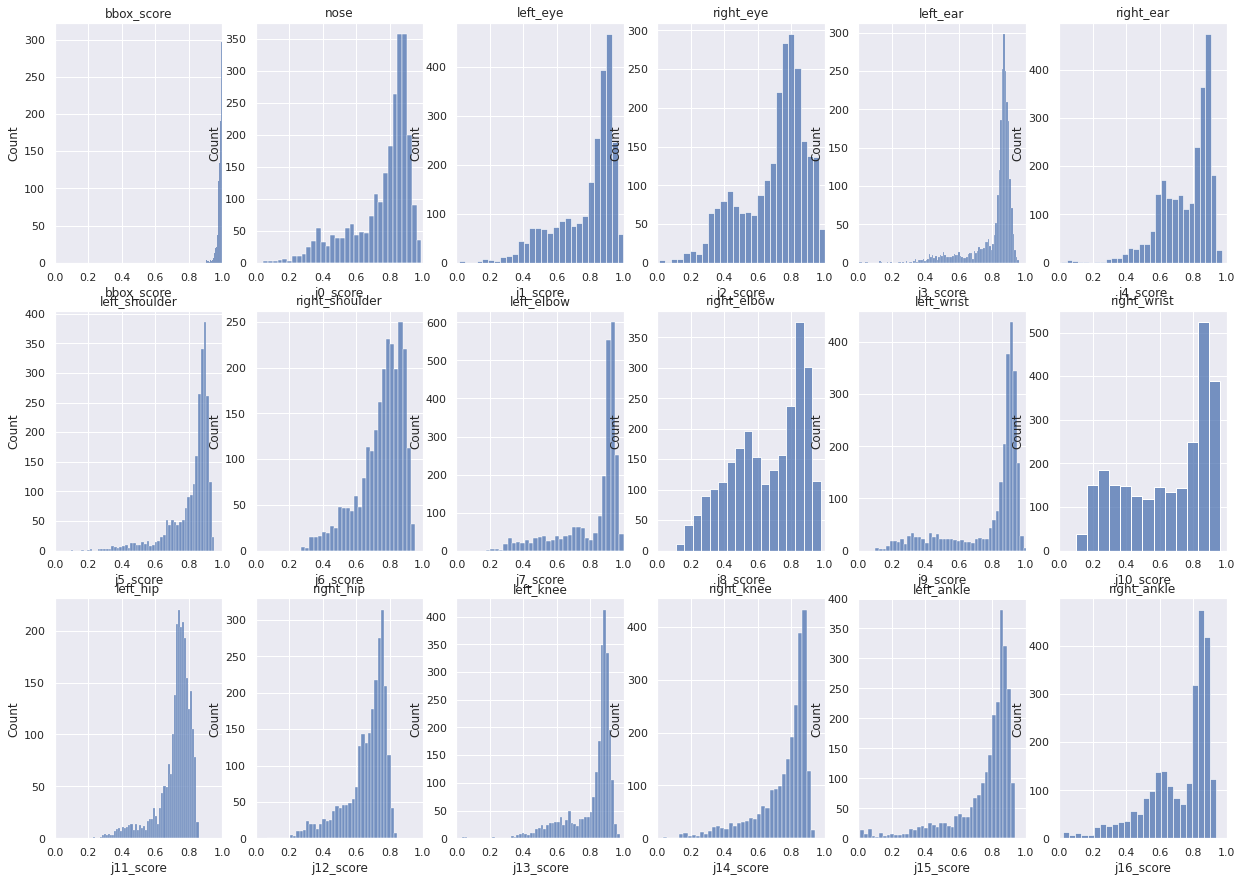

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()
sns.set(rc={'figure.figsize':(21,15)})

import matplotlib.pyplot as plt
n_rows=3
n_cols=6
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

# Set x axis limit (keep all charts on same axis)
for row in axes:
    for chart in row:
        chart.set_xlim(0,1) 

for i, column in enumerate(df[score_column_names].columns):
    ax = sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])
    if column == 'bbox_score':
        ax.set_title('bbox_score')
    else: 
        ax.set_title(joint_order[i-1]) # Currently has bbox as well, so need to offset title

In [15]:
def f2d_skeleton_smoothness(df):
    ''' Get Euclidean distance '''
    
    # Build dict to accumulate calcs
    dict_2d_smth = {}
    for j in range(17):
            joint_field = 'j{}_euc_dist'.format(j)
            dict_2d_smth[joint_field] = []

    # Iterate through rows (Standard shift(-1) can't be used with this calc, so must iterate)
    for i in range(len(df)):
        for j in range(17):
            joint_field_x = 'j{}_x'.format(j)
            joint_field_y = 'j{}_y'.format(j)
            joint_field_score = 'j{}_score'.format(j)
            
            #TODO(znoland): return NaN when score below certain amount?
            
            try:
                dict_2d_smth['j{}_euc_dist'.format(j)].append(
                    euclidean_dist(
                        np.array([df.loc[i, joint_field_x], df.loc[i, joint_field_y]]), 
                        np.array([df.loc[i+1, joint_field_x], df.loc[i+1, joint_field_y]])
                    )
                )
            except:
                print('skiped row {}'.format(i))

    return pd.DataFrame(dict_2d_smth)

df_2d_smth = f2d_skeleton_smoothness(df)
df_2d_smth


skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505
skiped row 2505


,j0_euc_dist,j1_euc_dist,j2_euc_dist,j3_euc_dist,j4_euc_dist,j5_euc_dist,j6_euc_dist,j7_euc_dist,j8_euc_dist,j9_euc_dist,j10_euc_dist,j11_euc_dist,j12_euc_dist,j13_euc_dist,j14_euc_dist,j15_euc_dist,j16_euc_dist
0,2.548265,2.678623,2.732120,13.863054,2.435454,0.994502,1.229266,1.256813,16.235238,9.984045,2.242538,2.464835,12.283364,5.116811,11.660641,3.653324,6.765198
1,2.786521,1.302492,2.074532,11.277452,3.469690,6.620640,4.245444,6.097448,15.468022,2.067138,6.120158,8.163244,9.877203,4.935952,23.220571,4.244896,11.170328
2,8.411126,4.520388,4.563051,4.364437,11.480858,7.345759,5.237074,5.643246,12.171454,6.083311,11.312000,13.241702,24.125646,3.154436,35.209977,1.520840,15.373506
3,12.181572,11.004917,12.304168,7.765134,12.775537,9.592179,7.053765,3.476611,17.275634,3.141263,23.034383,5.087159,7.290120,1.988226,17.251493,15.615870,14.175092
4,0.241535,1.275602,1.265541,2.178312,2.968997,7.187027,6.560481,6.397808,12.388109,8.541433,4.861896,13.396498,8.299264,6.398352,16.071760,50.753540,18.697461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,4.433329,4.335553,4.490923,6.214398,4.433329,11.674583,6.903143,3.344078,3.391134,38.055621,24.872010,11.424213,14.598411,8.919522,9.530752,9.722977,8.679225
2501,15.961331,1.995693,2.803926,8.741049,2.705767,1.161330,2.972296,10.853118,3.275868,9.509641,2.830549,3.258405,8.130476,7.075451,5.521513,5.790142,6.389064
2502,17.183102,8.789409,4.816475,12.078831,6.056684,14.573128,4.823750,12.544719,6.092782,44.098085,6.905469,11.382097,5.409217,3.172039,6.600773,7.583612,7.149911
2503,114.401725,6.729696,5.688777,6.421748,5.800589,4.245981,7.819049,7.115755,9.927031,73.369262,26.221019,8.223283,5.459402,17.541260,5.986411,7.699404,4.630536


In [16]:
# Median distance between joints and previous frame by joint
df_euc_by_joint = pd.DataFrame(df_2d_smth.median()).T
df_euc_by_joint.columns = joint_order
df_euc_by_joint.T

,0
nose,8.787827
left_eye,8.175279
right_eye,8.336343
left_ear,7.366004
right_ear,7.623123
left_shoulder,7.012586
right_shoulder,7.865360
left_elbow,7.710422
right_elbow,9.855169
left_wrist,8.743822


### Visualize Sample Euclidean Distance - Hist

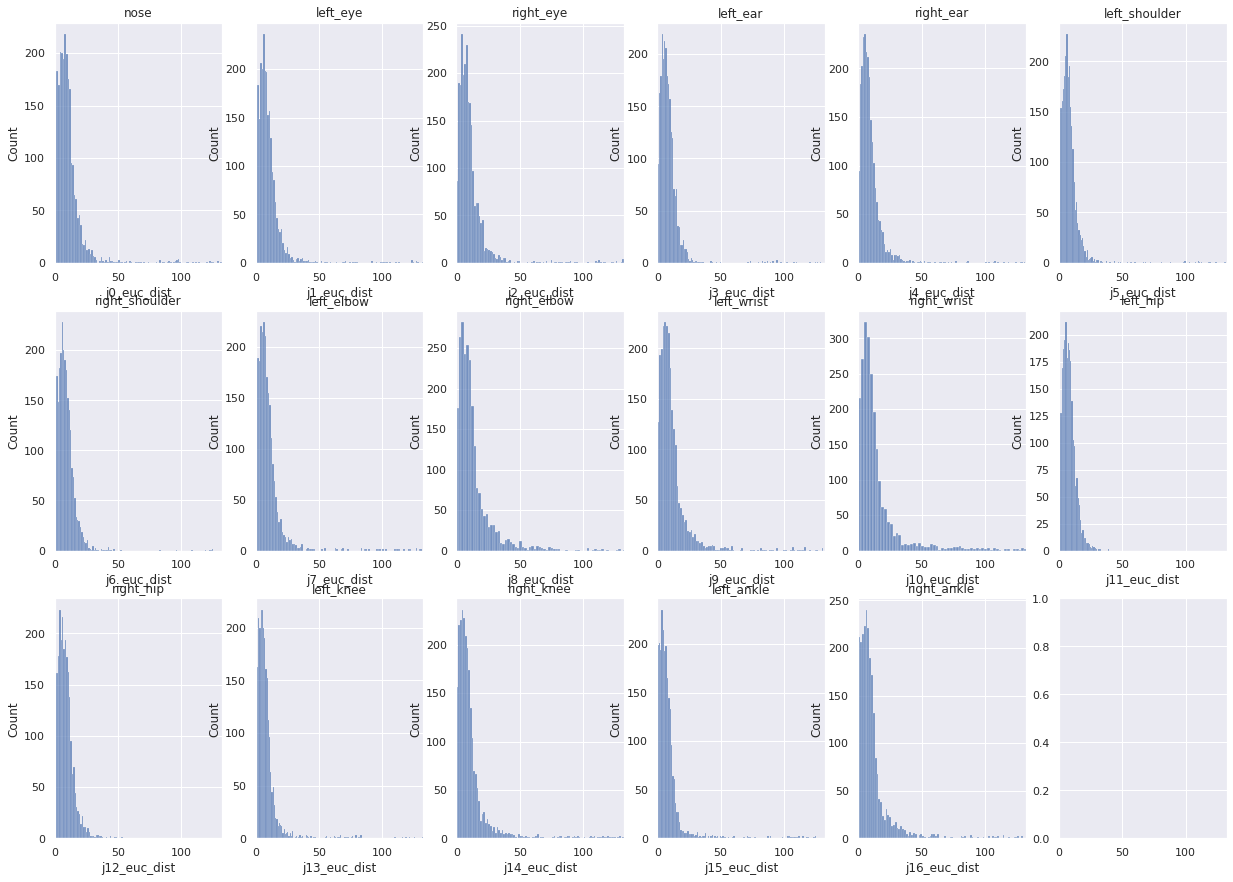

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()
sns.set(rc={'figure.figsize':(21,15)})

# df_2d_smth.j0_euc_dist.hist()
# sns.histplot(df_2d_smth).show()
    
import matplotlib.pyplot as plt
n_rows=3
n_cols=6
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

# Set x axis limit (keep all charts on same axis)
for row in axes:
    for chart in row:
        chart.set_xlim(0,df_2d_smth.quantile(0.90).max()) # df_2d_smth.max().max()

for i, column in enumerate(df_2d_smth.columns):
    ax = sns.histplot(df_2d_smth[column],ax=axes[i//n_cols,i%n_cols])
    ax.set_title(joint_order[i]) 


## Load example ground truth video

In [18]:
import json

with open('work_dirs/tumeke_testing/ground_truth_labels/AFG_subject_switching_close_nurses_subjects1_partial.json') as f:
  labels = json.load(f)

In [19]:
len(labels)

520

In [20]:
labels[0]

{'id': 5224,
 'annotations': [{'id': 2320,
   'completed_by': {'id': 1,
    'email': 'diwakar@tumeke.io',
    'first_name': '',
    'last_name': ''},
   'result': [{'original_width': 720,
     'original_height': 1280,
     'image_rotation': 0,
     'value': {'x': 15.563255548477173,
      'y': 32.017916440963745,
      'width': 52.41227149963379,
      'height': 73.46944212913513,
      'rotation': 0,
      'rectanglelabels': ['Person_1']},
     'id': '0H9QiQwrv4',
     'from_name': 'rectangle-label',
     'to_name': 'img-1',
     'type': 'rectanglelabels'},
    {'original_width': 720,
     'original_height': 1280,
     'image_rotation': 0,
     'value': {'x': 9.109919518232346,
      'y': 31.730416417121887,
      'width': 92.88871884346008,
      'height': 64.13283348083496,
      'rotation': 0,
      'rectanglelabels': ['Person_2']},
     'id': 'UptYJnYMDK',
     'from_name': 'rectangle-label',
     'to_name': 'img-1',
     'type': 'rectanglelabels'},
    {'original_width': 720,
   

In [21]:
# test = pd.DataFrame(labels[0]['pose-keypoints'])

# test['x_px'] = (test['x']) / 100.0 * test['original_width']
# test['y_px'] = (test['y']) / 100.0 * test['original_height']

# test

In [22]:
# from matplotlib.pyplot import figure
# import matplotlib.image as mpimg 
# from scipy import ndimage

# img = mpimg.imread('work_dirs/tumeke_testing/ground_truth_images/BAR-S_water_ballon/00001274.jpg')
# sns.scatterplot(data=test, x="x_px", y="y_px")
# # ax.invert_yaxis()
# # width_perc = 720 / 1280
# # plt.rcParams["figure.figsize"] = (10 * width_perc, 10)
# # plt.xlim(0, 720)
# # plt.ylim(0, 1280)
# plt.imshow(img)
# plt.show()

## Structure ground truth data

In [23]:
# img, id, keypoints (j0_x, j0_y)

# 1) loop through each frame
# 2) take the first person (wait till we have the relationships)
# 3) pivot into dataframe like previous function for ETL

In [24]:
labels[0:1]

[{'id': 5224,
  'annotations': [{'id': 2320,
    'completed_by': {'id': 1,
     'email': 'diwakar@tumeke.io',
     'first_name': '',
     'last_name': ''},
    'result': [{'original_width': 720,
      'original_height': 1280,
      'image_rotation': 0,
      'value': {'x': 15.563255548477173,
       'y': 32.017916440963745,
       'width': 52.41227149963379,
       'height': 73.46944212913513,
       'rotation': 0,
       'rectanglelabels': ['Person_1']},
      'id': '0H9QiQwrv4',
      'from_name': 'rectangle-label',
      'to_name': 'img-1',
      'type': 'rectanglelabels'},
     {'original_width': 720,
      'original_height': 1280,
      'image_rotation': 0,
      'value': {'x': 9.109919518232346,
       'y': 31.730416417121887,
       'width': 92.88871884346008,
       'height': 64.13283348083496,
       'rotation': 0,
       'rectanglelabels': ['Person_2']},
      'id': 'UptYJnYMDK',
      'from_name': 'rectangle-label',
      'to_name': 'img-1',
      'type': 'rectanglelabels'},

In [25]:
import re

joint_order = [
    'Nose', 
    'L_Eye', 
    'R_Eye', 
    'L_Ear', 
    'R_Ear', 
    'L_Shoulder', 
    'R_Shoulder', 
    'L_Elbow', 
    'R_Elbow', 
    'L_Wrist', 
    'R_Wrist', 
    'L_Hip', 
    'R_Hip', 
    'L_Knee', 
    'R_Knee', 
    'L_Ankle', 
    'R_Ankle' 
]

def extract_x_and_y(joint):
    return np.array([joint['x'], joint['y']])


def closest_subject_heuristic_raw(keypoint_obj):
    '''Get avg euclidean distance between right shoulder/elbow, left shoulder/elbow, right shoulder/hip and left shoulder/hip''' 
    r_shoulder_i = joint_order.index('R_Shoulder')
    r_elbow_i = joint_order.index('R_Elbow')
    r_hip_i= joint_order.index('R_Hip')
    l_shoulder_i = joint_order.index('L_Shoulder')
    l_elbow_i = joint_order.index('L_Elbow')
    l_hip_i = joint_order.index('L_Hip')
    
    r_se_ed = euclidean_dist(extract_x_and_y(keypoint_obj[r_shoulder_i]), extract_x_and_y(keypoint_obj[r_elbow_i]))
    r_sh_ed = euclidean_dist(extract_x_and_y(keypoint_obj[r_shoulder_i]), extract_x_and_y(keypoint_obj[r_hip_i]))
    l_se_ed = euclidean_dist(extract_x_and_y(keypoint_obj[l_shoulder_i]), extract_x_and_y(keypoint_obj[l_elbow_i]))
    l_sh_ed = euclidean_dist(extract_x_and_y(keypoint_obj[l_shoulder_i]), extract_x_and_y(keypoint_obj[l_hip_i]))
    return np.array([r_se_ed, r_sh_ed, l_se_ed, l_sh_ed]).mean()


def ground_truth_processing(labels):
    '''Tranform ground truth data into data frame

        1) Get Subjects

        2) Get Keypoints for each subject

        3) Order subjects by heuristic

    '''

    frame_array = []

    for label in labels:
    #     label = label_r[0]
        # label = labels[0:1][0]

        row = {}

        # Metadata
        img_name = re.search(r'(\d\d+)', label['data']['img']).group(0)
        row['id'] = int(img_name)
        row['ls_id'] = label['id']
        row['img'] = label['data']['img']
        row['subjects'] = []

        #Subjects
        persons_t = [p for p in label['annotations'][0]['result'] if p['type'] == 'rectanglelabels']

        # Keypoints
        keypoints_t = [k for k in label['annotations'][0]['result'] if k['type'] == 'keypointlabels']

        for i, person in enumerate(persons_t):

            # Filter on subject's keypoints
            person_keypoints_t = [k for k in keypoints_t if k['parentID'] == person['id']]
            # Filter out unused keypoints
            person_keypoints_t = [k for k in person_keypoints_t if k['value']['keypointlabels'][0] in joint_order]

             # Set order of keypoints + set placeholders when null
            person_keypoints_sorted = []
            for i, joint_name in enumerate(joint_order):
                target_keypoint = [k for k in person_keypoints_t if k['value']['keypointlabels'][0] == joint_name]

                if target_keypoint:
                    original_width = target_keypoint[0]['original_width']
                    original_height = target_keypoint[0]['original_height']
                    target_keypoint = target_keypoint[0]['value']
                    target_keypoint['original_width'] = original_width
                    target_keypoint['original_height'] = original_height
                else:
                    target_keypoint = {'x': np.nan, 'y': np.nan, 'width': np.nan, 'keypointlabels': [joint_name], 'original_width': np.nan, 'original_height': np.nan, }

                person_keypoints_sorted.append(target_keypoint)

            subject_t = {
                'name': person['value']['rectanglelabels'][0],
                'id': person['id'],
                'pose-keypoints': person_keypoints_sorted,
                'closest-subject-heuristic': closest_subject_heuristic_raw(person_keypoints_sorted)
            }
            row['subjects'].append(subject_t)


        # Sort subjects by heuristic
        row['subjects'] = sorted(row['subjects'], key=lambda x: x['closest-subject-heuristic'], reverse=True)

        # Format x & y coordinates (for 1st subject only)
        for index, keypoint in enumerate(row['subjects'][0]['pose-keypoints']):
            if len(keypoint['keypointlabels']) > 1:
                raise ValueError('There are multiple labels for one keypoint!') 
            row['j{}_x'.format(index)] = keypoint['x'] / 100.0 * keypoint['original_width']
            row['j{}_y'.format(index)] = keypoint['y'] / 100.0 * keypoint['original_height']
            row['j{}_l'.format(index)] = keypoint['keypointlabels'][0]

        frame_array.append(row)
        
    return frame_array

# raw array is "frame_array" !
gt_frame_array = ground_truth_processing(labels)
gt_df = pd.DataFrame(gt_frame_array)
# Order by ID
gt_df = gt_df.sort_values(by='id')
gt_df = gt_df.reset_index(drop=True)
gt_df = gt_df.set_index('id')
gt_df

,ls_id,img,subjects,j0_x,j0_y,j0_l,j1_x,j1_y,j1_l,j2_x,j2_y,j2_l,j3_x,j3_y,j3_l,j4_x,j4_y,j4_l,j5_x,j5_y,j5_l,j6_x,j6_y,j6_l,j7_x,j7_y,j7_l,j8_x,j8_y,j8_l,j9_x,j9_y,j9_l,j10_x,j10_y,j10_l,j11_x,j11_y,j11_l,j12_x,j12_y,j12_l,j13_x,j13_y,j13_l,j14_x,j14_y,j14_l,j15_x,j15_y,j15_l,j16_x,j16_y,j16_l
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4710,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'qjhyFNAyAq', 'pos...",594.346222,209.701176,Nose,598.672357,173.854160,L_Eye,593.059931,179.357586,R_Eye,659.352336,173.772335,L_Ear,NaN,NaN,R_Ear,725.559940,300.762787,L_Shoulder,639.989834,300.628166,R_Shoulder,725.572815,529.663506,L_Elbow,716.300537,535.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,684.119568,L_Hip,648.312321,673.136292,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,664.912089,1107.533875,L_Ankle,676.850092,1232.228714,R_Ankle
2,4711,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': '0kd0Xyz7Fm', 'pos...",590.346222,206.356163,Nose,601.826720,173.854160,L_Eye,593.077955,173.776608,R_Eye,662.579956,173.772335,L_Ear,NaN,NaN,R_Ear,731.510496,300.762787,L_Shoulder,648.716369,297.477322,R_Shoulder,725.572815,529.663506,L_Elbow,714.300537,540.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,678.136444,L_Hip,648.312321,667.095947,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,650.952001,1092.459259,L_Ankle,664.850092,1106.228714,R_Ankle
4,4712,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'UBv5oOjMLe', 'pos...",594.346222,209.701176,Nose,598.672357,173.854160,L_Eye,593.059931,179.357586,R_Eye,659.352336,173.772335,L_Ear,NaN,NaN,R_Ear,725.559940,300.762787,L_Shoulder,639.989834,300.628166,R_Shoulder,725.572815,529.663506,L_Elbow,716.300537,535.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,684.119568,L_Hip,648.312321,673.136292,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,664.912089,1107.533875,L_Ankle,676.850092,1232.228714,R_Ankle
6,4713,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'mF3VTXhEor', 'pos...",590.346222,206.356163,Nose,601.826720,173.854160,L_Eye,593.077955,173.776608,R_Eye,662.579956,173.772335,L_Ear,NaN,NaN,R_Ear,731.510496,300.762787,L_Shoulder,648.716369,297.477322,R_Shoulder,725.572815,529.663506,L_Elbow,714.300537,540.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,678.136444,L_Hip,648.312321,667.095947,R_Hip,623.471375,935.171356,L_Knee,671.534214,927.206146,R_Knee,652.952001,1121.459259,L_Ankle,680.850092,1221.228714,R_Ankle
8,4714,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'ZSRJ9gqvi9', 'pos...",608.346222,209.701176,Nose,598.672357,173.854160,L_Eye,593.059931,179.357586,R_Eye,659.352336,173.772335,L_Ear,NaN,NaN,R_Ear,725.559940,300.762787,L_Shoulder,639.989834,300.628166,R_Shoulder,725.572815,529.663506,L_Elbow,716.300537,535.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,684.119568,L_Hip,648.312321,673.136292,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,664.912089,1107.533875,L_Ankle,676.850092,1232.228714,R_Ankle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,5225,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_1', 'id': 'CFzj8KlP3x', 'pos...",298.383479,506.427917,Nose,300.454016,485.867844,L_Eye,273.618279,491.214447,R_Eye,NaN,NaN,L_Ear,213.386056,487.758369,R_Ear,300.012052,573.496094,L_Shoulder,145.328404,595.902824,R_Shoulder,377.914796,653.760452,L_Elbow,175.173472,718.181610,R_Elbow,NaN,NaN,L_Wrist,192.090175,532.129517,R_Wrist,313.582056,836.680298,L_Hip,195.390279

In [26]:
gt_df['subjects'].loc[[2]].values[0]

[{'name': 'Person_2',
  'id': '0kd0Xyz7Fm',
  'pose-keypoints': [{'x': 81.9925308227539,
    'y': 16.121575236320496,
    'width': 0.3824,
    'keypointlabels': ['Nose'],
    'original_width': 720,
    'original_height': 1280},
   {'x': 83.58704447746277,
    'y': 13.58235627412796,
    'width': 0.3824,
    'keypointlabels': ['L_Eye'],
    'original_width': 720,
    'original_height': 1280},
   {'x': 82.37193822860718,
    'y': 13.576297461986542,
    'width': 0.3824,
    'keypointlabels': ['R_Eye'],
    'original_width': 720,
    'original_height': 1280},
   {'x': 92.02499389648438,
    'y': 13.5759636759758,
    'width': 0.3824,
    'keypointlabels': ['L_Ear'],
    'original_width': 720,
    'original_height': 1280},
   {'x': nan,
    'y': nan,
    'width': nan,
    'keypointlabels': ['R_Ear'],
    'original_width': nan,
    'original_height': nan},
   {'x': 101.59868001937866,
    'y': 23.497092723846436,
    'width': 0.3824,
    'keypointlabels': ['L_Shoulder'],
    'original_width

In [27]:
# OLDER METHOD FOR SIGNLE SUBJECT VIDEOS

# import re

# joint_order = [
#     'Nose', 
#     'L_Eye', 
#     'R_Eye', 
#     'L_Ear', 
#     'R_Ear', 
#     'L_Shoulder', 
#     'R_Shoulder', 
#     'L_Elbow', 
#     'R_Elbow', 
#     'L_Wrist', 
#     'R_Wrist', 
#     'L_Hip', 
#     'R_Hip', 
#     'L_Knee', 
#     'R_Knee', 
#     'L_Ankle', 
#     'R_Ankle' 
# ]

# def ground_truth_etl(labels):
#     '''Tranform ground truth data into data frame'''
#     frame_array = []
#     for label in labels:
#         row = {}
#         img_name = re.search(r'(\d\d+)', label['img']).group(0)
#         row['id'] = int(img_name)
#         row['ls_id'] = label['id']
#         row['img'] = label['img']
        
#         # Filter out unused keypoints
#         label['pose-keypoints'] = [keypoint for keypoint in label['pose-keypoints'] if keypoint['keypointlabels'][0] in joint_order]
#         # Set order of keypoints
#         label['pose-keypoints'].sort(key=lambda x: joint_order.index(x['keypointlabels'][0]))

#         for index, keypoint in enumerate(label['pose-keypoints']):
#             if len(keypoint['keypointlabels']) > 1:
#                 raise ValueError('There are multiple labels for one keypoint!') 
#             row['j{}_x'.format(index)] = keypoint['x'] / 100.0 * keypoint['original_width']
#             row['j{}_y'.format(index)] = keypoint['y'] / 100.0 * keypoint['original_height']
#             row['j{}_l'.format(index)] = keypoint['keypointlabels'][0]

#         frame_array.append(row)
        
#     return pd.DataFrame(frame_array)
        
# gt_df = ground_truth_etl(labels)
# # Order by ID
# gt_df = gt_df.sort_values(by='id')
# gt_df = gt_df.reset_index(drop=True)
# gt_df = gt_df.set_index('id')

In [28]:
#NOTE: IT APPEARS AS IF A ROW IS NOT RETURNED WHEN a frame is not labeled!!!

pd.set_option("display.max_columns", None)
gt_df

,ls_id,img,subjects,j0_x,j0_y,j0_l,j1_x,j1_y,j1_l,j2_x,j2_y,j2_l,j3_x,j3_y,j3_l,j4_x,j4_y,j4_l,j5_x,j5_y,j5_l,j6_x,j6_y,j6_l,j7_x,j7_y,j7_l,j8_x,j8_y,j8_l,j9_x,j9_y,j9_l,j10_x,j10_y,j10_l,j11_x,j11_y,j11_l,j12_x,j12_y,j12_l,j13_x,j13_y,j13_l,j14_x,j14_y,j14_l,j15_x,j15_y,j15_l,j16_x,j16_y,j16_l
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4710,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'qjhyFNAyAq', 'pos...",594.346222,209.701176,Nose,598.672357,173.854160,L_Eye,593.059931,179.357586,R_Eye,659.352336,173.772335,L_Ear,NaN,NaN,R_Ear,725.559940,300.762787,L_Shoulder,639.989834,300.628166,R_Shoulder,725.572815,529.663506,L_Elbow,716.300537,535.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,684.119568,L_Hip,648.312321,673.136292,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,664.912089,1107.533875,L_Ankle,676.850092,1232.228714,R_Ankle
2,4711,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': '0kd0Xyz7Fm', 'pos...",590.346222,206.356163,Nose,601.826720,173.854160,L_Eye,593.077955,173.776608,R_Eye,662.579956,173.772335,L_Ear,NaN,NaN,R_Ear,731.510496,300.762787,L_Shoulder,648.716369,297.477322,R_Shoulder,725.572815,529.663506,L_Elbow,714.300537,540.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,678.136444,L_Hip,648.312321,667.095947,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,650.952001,1092.459259,L_Ankle,664.850092,1106.228714,R_Ankle
4,4712,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'UBv5oOjMLe', 'pos...",594.346222,209.701176,Nose,598.672357,173.854160,L_Eye,593.059931,179.357586,R_Eye,659.352336,173.772335,L_Ear,NaN,NaN,R_Ear,725.559940,300.762787,L_Shoulder,639.989834,300.628166,R_Shoulder,725.572815,529.663506,L_Elbow,716.300537,535.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,684.119568,L_Hip,648.312321,673.136292,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,664.912089,1107.533875,L_Ankle,676.850092,1232.228714,R_Ankle
6,4713,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'mF3VTXhEor', 'pos...",590.346222,206.356163,Nose,601.826720,173.854160,L_Eye,593.077955,173.776608,R_Eye,662.579956,173.772335,L_Ear,NaN,NaN,R_Ear,731.510496,300.762787,L_Shoulder,648.716369,297.477322,R_Shoulder,725.572815,529.663506,L_Elbow,714.300537,540.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,678.136444,L_Hip,648.312321,667.095947,R_Hip,623.471375,935.171356,L_Knee,671.534214,927.206146,R_Knee,652.952001,1121.459259,L_Ankle,680.850092,1221.228714,R_Ankle
8,4714,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_2', 'id': 'ZSRJ9gqvi9', 'pos...",608.346222,209.701176,Nose,598.672357,173.854160,L_Eye,593.059931,179.357586,R_Eye,659.352336,173.772335,L_Ear,NaN,NaN,R_Ear,725.559940,300.762787,L_Shoulder,639.989834,300.628166,R_Shoulder,725.572815,529.663506,L_Elbow,716.300537,535.847984,R_Elbow,590.307126,515.846291,L_Wrist,584.815464,615.196877,R_Wrist,697.945032,684.119568,L_Hip,648.312321,673.136292,R_Hip,623.471375,935.171356,L_Knee,656.534214,935.206146,R_Knee,664.912089,1107.533875,L_Ankle,676.850092,1232.228714,R_Ankle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,5225,s3://pose-estimation-image/AFG_subject_switchi...,"[{'name': 'Person_1', 'id': 'CFzj8KlP3x', 'pos...",298.383479,506.427917,Nose,300.454016,485.867844,L_Eye,273.618279,491.214447,R_Eye,NaN,NaN,L_Ear,213.386056,487.758369,R_Ear,300.012052,573.496094,L_Shoulder,145.328404,595.902824,R_Shoulder,377.914796,653.760452,L_Elbow,175.173472,718.181610,R_Elbow,NaN,NaN,L_Wrist,192.090175,532.129517,R_Wrist,313.582056,836.680298,L_Hip,195.390279

In [29]:
from matplotlib.pyplot import figure
import matplotlib.image as mpimg 
from scipy import ndimage
import re

def visualize_gt_frame(frame_row):
    img_name = re.search(r'(\d+[.][jpg]+)', frame_row['img'].values[0]).group(0)
    img = mpimg.imread('work_dirs/tumeke_testing/ground_truth_images/BAR-S_water_ballon/{}'.format(img_name))
    for j in range(17): # 19 originally
        x = "j{}_x".format(j)
        y = "j{}_y".format(j)
        l = "j{}_l".format(j)
        p1 = sns.scatterplot(data=frame_row, x=x, y=y)
        # Add text besides each point
        p1.text(frame_row[x]+10, frame_row[y], 
             frame_row[l].values[0], horizontalalignment='left', 
             size=7, color='white', weight='regular')
    plt.imshow(img)
    plt.show()

In [30]:
# visualize_gt_frame(gt_df[0:1])
# visualize_gt_frame(gt_df[20:21])

In [31]:
# gt_df[0:1].img.values[0] # 1 indexed - The frame number is the image name

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


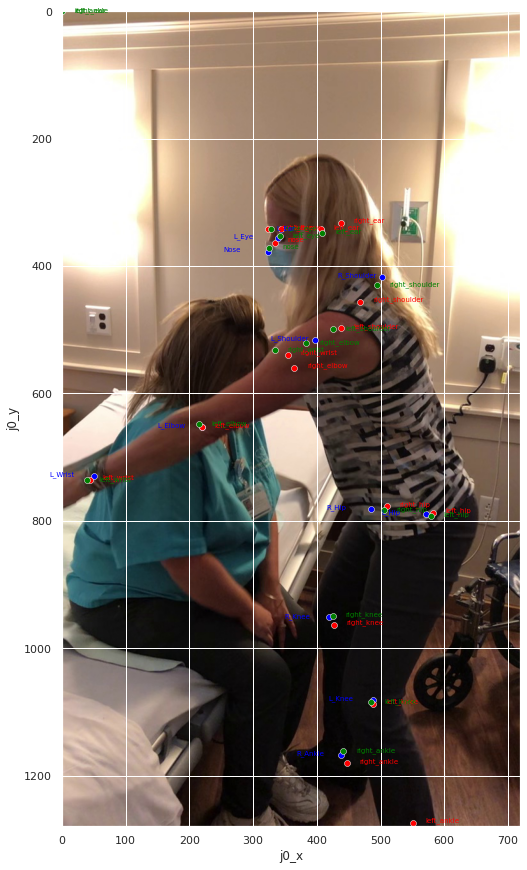

In [32]:
def visualize_overlap(frame_number):
    gt_f = gt_df.loc[[frame_number]]
    f = df.loc[[frame_number]]
    w_f = wrnch_df.loc[[frame_number]]
    
    frame_img_name = re.search(r'(\d+[.][jpg]+)', gt_f['img'].values[0]).group(0)
    file_img_name = re.findall(r'/([0-9a-zA-Z-_]+)', gt_df[0:1].img.values[0])[1]
    img = mpimg.imread('work_dirs/tumeke_testing/ground_truth_images/{}/{}'.format(file_img_name, frame_img_name))
    
    for j in range(17):
        x = "j{}_x".format(j)
        y = "j{}_y".format(j)
        l = "j{}_l".format(j)
        # Ground Truth - BLUE
        p1 = sns.scatterplot(data=gt_f, x=x, y=y, color='blue')
        p1.text(gt_f[x]-70, gt_f[y], 
             gt_f[l].values[0], horizontalalignment='left', 
             size=7, color='blue', weight='regular')
        # Hrnet Model - RED
        p2 = sns.scatterplot(data=f, x=x, y=y, color='red')
        p2.text(f[x]+20, f[y]-1, 
             f[l].values[0], horizontalalignment='left', 
             size=7, color='red', weight='regular')
        
        # Wrnch - GREEN
        p3 = sns.scatterplot(data=w_f, x=x, y=y, color='green')
        p3.text(w_f[x]+20, w_f[y]+1, 
             w_f[l].values[0], horizontalalignment='left', 
             size=7, color='green', weight='regular')
        
        
        
    plt.imshow(img)
    plt.show()
    
    
visualize_overlap(1000) # 1000

In [33]:
# test = df['j0_x'] / gt_df['j0_x']
# test.count()

428

In [35]:
# df.loc[[600]]

## PCK - Percentage of Correct Key-points

Description: https://github.com/cbsudux/Human-Pose-Estimation-101#percentage-of-correct-parts---pcp


Percentage of Correct Key-points - PCK:
* Detected joint is considered correct if the distance between the predicted and the true joint is within a certain threshold (threshold varies)
* PCKh@0.5 is when the threshold = 50% of the head bone link
* PCK@0.2 == Distance between predicted and true joint < 0.2 * torso diameter
* Sometimes 150 mm is taken as the threshold
* Head, shoulder, Elbow, Wrist, Hip, Knee, Ankle → Keypoints
* PCK is used for 2D and 3D (PCK3D)
* Higher the better

In [36]:
# pelvis is in the middle of l_hip and r_hip
# keypoints_new[0] = (keypoints[11] + keypoints[12]) / 2
# thorax is in the middle of l_shoulder and r_shoulder
# keypoints_new[8] = (keypoints[5] + keypoints[6]) / 2

In [37]:
# IMPORTANT !!!!!!!!!!! - THIS IS A TEST - CHANGE BACK!
# df = wrnch_df
# df

In [38]:
def extract_j_pos(f, v, joint_name):
    return f['j{}_{}'.format(joint_order.index(joint_name), v)]

def get_torso_diameter(x):
    return euclidean_dist(np.array([x['pelvis_x'], x['pelvis_y']]), np.array([x['thorax_x'], x['thorax_y']]))

for df_i in [df, gt_df]:
    
    df_i['pelvis_x'] = (extract_j_pos(df_i, 'x', 'L_Hip') + extract_j_pos(df_i, 'x', 'R_Hip')) / 2
    df_i['pelvis_y'] = (extract_j_pos(df_i, 'y', 'L_Hip') + extract_j_pos(df_i, 'y', 'R_Hip')) / 2
    df_i['thorax_x'] = (extract_j_pos(df_i, 'x', 'L_Shoulder') + extract_j_pos(df_i, 'x', 'R_Shoulder')) / 2
    df_i['thorax_y'] = (extract_j_pos(df_i, 'y', 'L_Shoulder') + extract_j_pos(df_i, 'y', 'R_Shoulder')) / 2
    
    df_i['torso_diameter'] = df_i.apply(lambda x: get_torso_diameter(x), axis=1)

In [39]:
# 1) Iterate through keypoints and check 
#    - distance between predicted and true joint < 0.2 * torso diameter

# 2) for row, get jX_d (joint detected)

# 3) Get percent of all values detected (across all keypoints)

In [40]:
pck_threshold_s = .20 * gt_df['torso_diameter']
pck_threshold_s

id
0       75.611107
2       74.776427
4       75.611107
6       74.776427
8       75.611107
          ...    
1030    54.578575
1032    55.351909
1034    54.957715
1036    55.414603
1038    56.533477
Name: torso_diameter, Length: 520, dtype: float64

In [41]:
def vect_duclidean_dist(df1, df2, cols=['x_coord','y_coord']):
    return np.linalg.norm(df1[cols].values - df2[cols].values, axis=1)

pck_df_raw = gt_df[[]] # Return just index
for j in range(17):
    x = "j{}_x".format(j)
    y = "j{}_y".format(j)
    pck_df_raw['{}_ed'.format(joint_order[j])] = vect_duclidean_dist(gt_df, df.iloc[gt_df.index], cols=[x,y])
    # pck_df['{}'.format(joint_order[j])] = vec_euclidean_dist(gt_df[[x,y]], df.iloc[gt_df.index][[x,y]])

pck_df_raw

/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Nose_ed,L_Eye_ed,R_Eye_ed,L_Ear_ed,R_Ear_ed,L_Shoulder_ed,R_Shoulder_ed,L_Elbow_ed,R_Elbow_ed,L_Wrist_ed,R_Wrist_ed,L_Hip_ed,R_Hip_ed,L_Knee_ed,R_Knee_ed,L_Ankle_ed,R_Ankle_ed
id,,,,,,,,,,,,,,,,,
0,24.545388,13.926232,16.995414,21.730934,NaN,19.104769,34.807589,18.107970,69.388250,6.574306,24.740459,26.169610,35.457026,6.491345,14.629979,121.353250,118.460742
2,21.488799,13.575549,13.325305,16.308814,NaN,30.200076,28.947773,14.894771,70.297049,1.975979,16.466878,26.330481,18.466238,9.008345,23.188673,136.735766,7.383120
4,24.137893,20.847357,24.557448,8.294071,NaN,15.855105,29.406530,15.759187,79.223962,4.925735,3.510279,21.508199,28.301431,6.439242,16.623037,105.656040,120.274724
6,30.838919,19.815599,22.216353,12.961495,NaN,18.725147,27.729164,12.835571,69.761357,3.090157,13.005283,25.464621,21.547705,5.225407,20.818415,119.947129,106.866964
8,22.532468,24.502229,15.758350,14.759319,NaN,18.473069,31.717024,9.454914,64.894398,9.662036,15.994463,21.015218,28.319506,2.366157,14.699411,126.574375,107.600201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,85.225410,79.587536,98.312314,NaN,290.060708,174.242129,393.336091,166.553651,255.886151,NaN,241.183682,376.608282,415.416329,174.760060,127.495744,230.870048,171.544423
1032,9.674515,5.853187,3.107411,NaN,3.059059,180.441442,2.118289,166.920128,13.044881,NaN,11.093091,363.470941,458.103002,172.852496,114.981686,38.255652,138.074262
1034,102.863578,111.555083,33.903763,NaN,307.210988,170.180877,393.960490,213.969955,3.081365,NaN,236.005083,363.797383,469.208002,170.598735,131.481802,226.329554,111.541812


In [42]:
pck_df_scores = pck_df_raw.lt(pck_threshold_s, axis='index') # True if distance less than PCK threshold
pck_df_scores = pck_df_scores.applymap(lambda x: 1 if x == True else 0)
pck_df_scores

,Nose_ed,L_Eye_ed,R_Eye_ed,L_Ear_ed,R_Ear_ed,L_Shoulder_ed,R_Shoulder_ed,L_Elbow_ed,R_Elbow_ed,L_Wrist_ed,R_Wrist_ed,L_Hip_ed,R_Hip_ed,L_Knee_ed,R_Knee_ed,L_Ankle_ed,R_Ankle_ed
id,,,,,,,,,,,,,,,,,
0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1
4,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,0
6,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
8,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1032,1,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1034,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [43]:
# % Detected frames
pck_df_scores.sum(axis=1).apply(lambda x: 1 if x > 0 else 0).sum() / pck_df_scores.sum(axis=1).count()

0.7019230769230769

In [44]:
# Total (all frames)
pck_df_scores.sum(axis=1).sum() / pck_df_scores.count(axis=1).sum()

0.5585972850678733

In [45]:
# Total (detected frames)
pck_detected_df = pck_df_scores.sum(axis=1).apply(lambda x: True if x > 0 else False)
pck_df_scores[pck_detected_df].sum(axis=1).sum() / pck_df_scores[pck_detected_df].count(axis=1).sum()

0.7958098307816277

In [46]:
# By Body part
pck_df_scores.sum() / pck_df_scores.count()

Nose_ed          0.525000
L_Eye_ed         0.521154
R_Eye_ed         0.448077
L_Ear_ed         0.642308
R_Ear_ed         0.188462
L_Shoulder_ed    0.625000
R_Shoulder_ed    0.638462
L_Elbow_ed       0.623077
R_Elbow_ed       0.550000
L_Wrist_ed       0.619231
R_Wrist_ed       0.436538
L_Hip_ed         0.636538
R_Hip_ed         0.634615
L_Knee_ed        0.644231
R_Knee_ed        0.636538
L_Ankle_ed       0.550000
R_Ankle_ed       0.576923
dtype: float64

<AxesSubplot:title={'center':'PCK over time by joint'}, xlabel='id'>

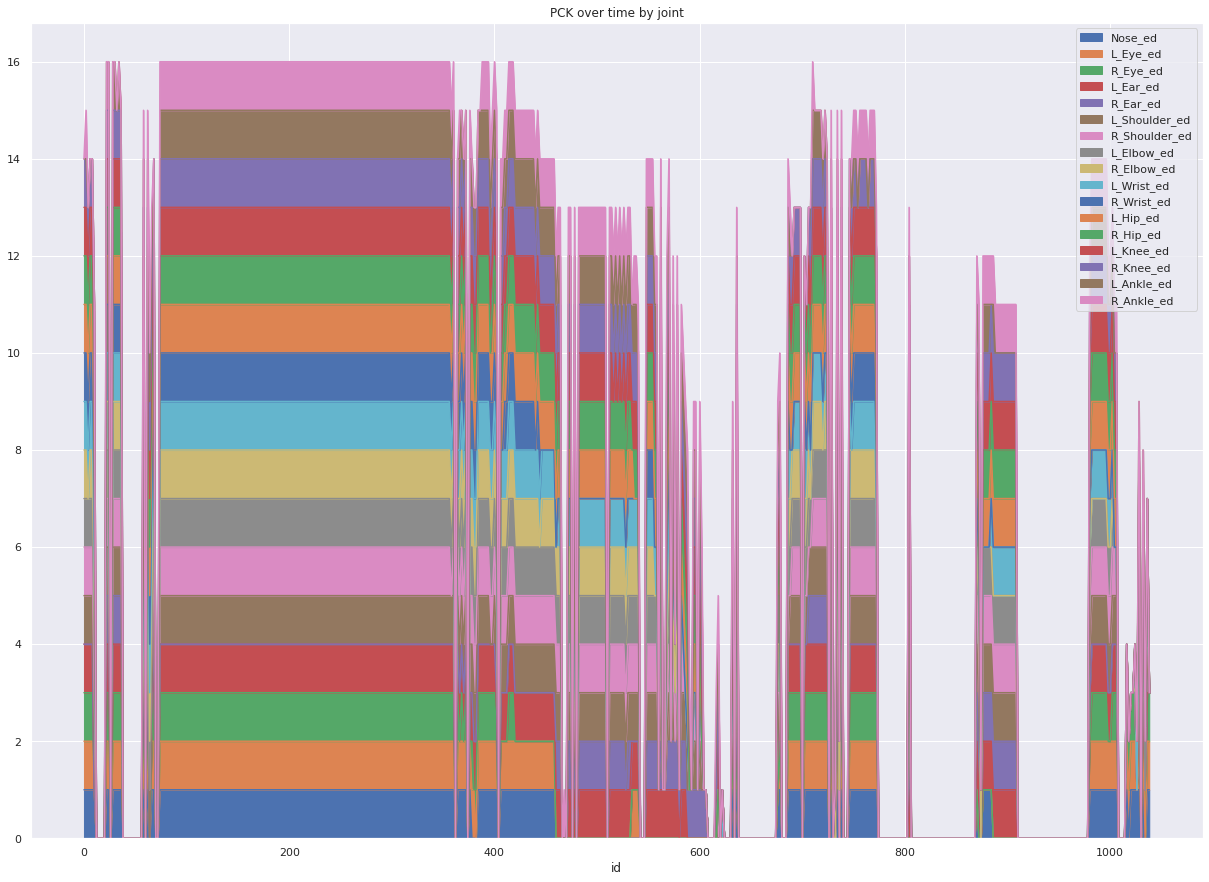

In [47]:
# by frame
# pd.DataFrame(pck_df_scores.sum(axis=1) / pck_df_scores.count(axis=1), columns=['PCK']).plot.area()
pd.DataFrame(pck_df_scores).plot.area(title='PCK over time by joint')

## PCP - Percentage of Correct Parts


https://github.com/cbsudux/Human-Pose-Estimation-101#percentage-of-correct-parts---pcp

### Percentage of Correct Parts - PCP
* A limb is considered detected and a correct part if the distance between the two predicted joint locations and the true limb joint locations is at most half of the limb length (PCP at 0.5 )
* Measures detection rate of limbs
* Cons - penalizes shorter limbs

Calculation:
* For a specific part, PCP = (No. of correct parts for entire dataset) / (No. of total parts for entire dataset)
* Take a dataset with 10 images and 1 pose per image. Each pose has 8 parts - ( upper arm, lower arm, upper leg, lower leg ) x2
* No of upper arms = 10 * 2 = 20
* No of lower arms = 20
* No of lower legs = No of upper legs = 20
* If upper arm is detected correct for 17 out of the 20 upper arms i.e 17 ( 10 right arms and 7 left) → PCP = 17/20 = 85%

Higher the better

In [48]:
# 1) ground truth limb length

# 2) Euclidean distance between joints (already done) + avg between start joint and end joint euclidean distances

# 3) Check if limb ed is less than threshold (ground truth limb length * .5)

In [49]:
'''Ground Truth Limb Length'''
limbs = [
    {'name':'L_upper_arm', 'joints': [joint_order.index('L_Shoulder'), joint_order.index('L_Elbow')]},
    {'name':'R_upper_arm', 'joints': [joint_order.index('R_Shoulder'), joint_order.index('R_Elbow')]},
    {'name':'L_lower_arm', 'joints': [joint_order.index('L_Elbow'), joint_order.index('L_Wrist')]},
    {'name':'R_lower_arm', 'joints': [joint_order.index('R_Elbow'), joint_order.index('R_Wrist')]},
    {'name':'L_upper_leg', 'joints': [joint_order.index('L_Hip'), joint_order.index('L_Knee')]},
    {'name':'R_upper_leg', 'joints': [joint_order.index('R_Hip'), joint_order.index('R_Knee')]},
    {'name':'L_lower_leg', 'joints': [joint_order.index('L_Knee'), joint_order.index('L_Ankle')]},
    {'name':'R_lower_leg', 'joints': [joint_order.index('R_Knee'), joint_order.index('R_Ankle')]}
]

# def get_limb_diameter(r):
#     return euclidean_dist(np.array([r[x1], r[y1]]), np.array([r[x2], r[y2]]))

pcp_gt_limb_length_df = gt_df[[]] # Return just index
for limb in limbs:
    # Get ground truth limb length
    j1 = limb['joints'][0] # joint 1 index
    j2 = limb['joints'][1] # joint 2 index
    x1 = "j{}_x".format(j1)
    y1 = "j{}_y".format(j1)
    x2 = "j{}_x".format(j2)
    y2 = "j{}_y".format(j2)
    pcp_gt_limb_length_df[limb['name']] = gt_df.apply(lambda r: euclidean_dist(np.array([r[x1], r[y1]]), np.array([r[x2], r[y2]])), axis=1)

pcp_gt_limb_length_df

/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,L_upper_arm,R_upper_arm,L_lower_arm,R_lower_arm,L_upper_leg,R_upper_leg,L_lower_leg,R_lower_leg
id,,,,,,,,
0,228.900719,247.288670,135.969563,153.572690,261.865091,262.198795,177.274281,297.716544
2,228.977717,252.052698,135.969563,149.312230,267.606561,268.236236,159.670502,171.224626
4,228.900719,247.288670,135.969563,153.572690,261.865091,262.198795,177.274281,297.716544
6,228.977717,252.052698,135.969563,149.312230,267.606561,261.144734,188.606177,294.170114
8,228.900719,247.288670,135.969563,153.572690,261.865091,262.198795,177.274281,297.716544
...,...,...,...,...,...,...,...,...
1030,111.853497,125.868302,NaN,186.819582,169.810371,237.319722,190.957297,209.482668
1032,107.994399,107.764688,NaN,192.767755,170.888375,241.865130,192.091949,209.971263
1034,104.426641,88.207196,NaN,190.827339,179.345422,247.178703,195.364332,207.746908


In [50]:
'''PCP Theshold'''
pcp_threshold_df = pcp_gt_limb_length_df * 0.50
pcp_threshold_df

,L_upper_arm,R_upper_arm,L_lower_arm,R_lower_arm,L_upper_leg,R_upper_leg,L_lower_leg,R_lower_leg
id,,,,,,,,
0,114.450360,123.644335,67.984781,76.786345,130.932546,131.099398,88.637140,148.858272
2,114.488859,126.026349,67.984781,74.656115,133.803281,134.118118,79.835251,85.612313
4,114.450360,123.644335,67.984781,76.786345,130.932546,131.099398,88.637140,148.858272
6,114.488859,126.026349,67.984781,74.656115,133.803281,130.572367,94.303089,147.085057
8,114.450360,123.644335,67.984781,76.786345,130.932546,131.099398,88.637140,148.858272
...,...,...,...,...,...,...,...,...
1030,55.926748,62.934151,NaN,93.409791,84.905186,118.659861,95.478649,104.741334
1032,53.997199,53.882344,NaN,96.383877,85.444187,120.932565,96.045974,104.985631
1034,52.213321,44.103598,NaN,95.413669,89.672711,123.589351,97.682166,103.873454


In [51]:
'''Limb Euclidean Dist'''
limbs = [
    {'name':'L_upper_arm', 'joints': ['L_Shoulder', 'L_Elbow']},
    {'name':'R_upper_arm', 'joints': ['R_Shoulder', 'R_Elbow']},
    {'name':'L_lower_arm', 'joints': ['L_Elbow', 'L_Wrist']},
    {'name':'R_lower_arm', 'joints': ['R_Elbow', 'R_Wrist']},
    {'name':'L_upper_leg', 'joints': ['L_Hip', 'L_Knee']},
    {'name':'R_upper_leg', 'joints': ['R_Hip', 'R_Knee']},
    {'name':'L_lower_leg', 'joints': ['L_Knee', 'L_Ankle']},
    {'name':'R_lower_leg', 'joints': ['R_Knee', 'R_Ankle']}
]

pcp_limb_ed_df = gt_df[[]] # Return just index
for limb in limbs:
    j1 = limb['joints'][0] # joint 1 name
    j2 = limb['joints'][1] # joint 2 name
    
    pcp_limb_ed_df[limb['name']] = pck_df_raw['{}_ed'.format(j1)] + pck_df_raw['{}_ed'.format(j2)] / 2
    
pcp_limb_ed_df

/home/ubuntu/anaconda3/envs/pytorch_latest_p37/lib/python3.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,L_upper_arm,R_upper_arm,L_lower_arm,R_lower_arm,L_upper_leg,R_upper_leg,L_lower_leg,R_lower_leg
id,,,,,,,,
0,28.158754,69.501713,21.395123,81.758479,29.415282,42.772016,67.167971,73.860350
2,37.647461,64.096297,15.882760,78.530488,30.834653,30.060574,77.376228,26.880233
4,23.734698,69.018511,18.222055,80.979101,24.727820,36.612949,59.267262,76.760399
6,25.142932,62.609843,14.380649,76.263998,28.077324,31.956913,65.198971,74.251897
8,23.200526,64.164223,14.285932,72.891629,22.198297,35.669212,65.653344,68.499512
...,...,...,...,...,...,...,...,...
1030,257.518955,521.279167,NaN,376.477992,463.988312,479.164201,290.195084,213.267955
1032,263.901506,8.640730,NaN,18.591426,449.897189,515.593845,191.980322,184.018817
1034,277.165855,395.501172,NaN,121.083906,449.096751,534.948902,283.763512,187.252708


In [52]:
# pcp_df_scores = pck_df_raw.lt(pck_threshold_s, axis='index') # True if distance less than PCP threshold
# pcp_df_scores = pck_df_scores.applymap(lambda x: 1 if x == True else 0)
# pcp_df_scores



In [53]:
pcp_df_scores = pcp_limb_ed_df.lt(pcp_threshold_df)
pcp_df_scores = pcp_df_scores.applymap(lambda x: 1 if x == True else 0)
pcp_df_scores

,L_upper_arm,R_upper_arm,L_lower_arm,R_lower_arm,L_upper_leg,R_upper_leg,L_lower_leg,R_lower_leg
id,,,,,,,,
0,1,1,1,0,1,1,1,1
2,1,1,1,0,1,1,1,1
4,1,1,1,0,1,1,1,1
6,1,1,1,0,1,1,1,1
8,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
1030,0,0,0,0,0,0,0,0
1032,0,1,0,1,0,0,0,0
1034,0,0,0,0,0,0,0,0


In [54]:
# % Detected frames
pcp_df_scores.sum(axis=1).apply(lambda x: 1 if x > 0 else 0).sum() / pcp_df_scores.sum(axis=1).count()

0.7076923076923077

In [55]:
# Total (all frames)
pcp_df_scores.sum(axis=1).sum() / pcp_df_scores.count(axis=1).sum()

0.5983173076923077

In [56]:
# Total (detected frames)
pcp_detected_df = pcp_df_scores.sum(axis=1).apply(lambda x: True if x > 0 else False)
pcp_df_scores[pcp_detected_df].sum(axis=1).sum() / pcp_df_scores[pcp_detected_df].count(axis=1).sum()

0.8454483695652174

In [57]:
# By Limb
pcp_df_scores.sum() / pcp_df_scores.count()

L_upper_arm    0.651923
R_upper_arm    0.551923
L_lower_arm    0.630769
R_lower_arm    0.415385
L_upper_leg    0.669231
R_upper_leg    0.655769
L_lower_leg    0.596154
R_lower_leg    0.615385
dtype: float64

<AxesSubplot:title={'center':'PCP over time by limb'}, xlabel='id'>

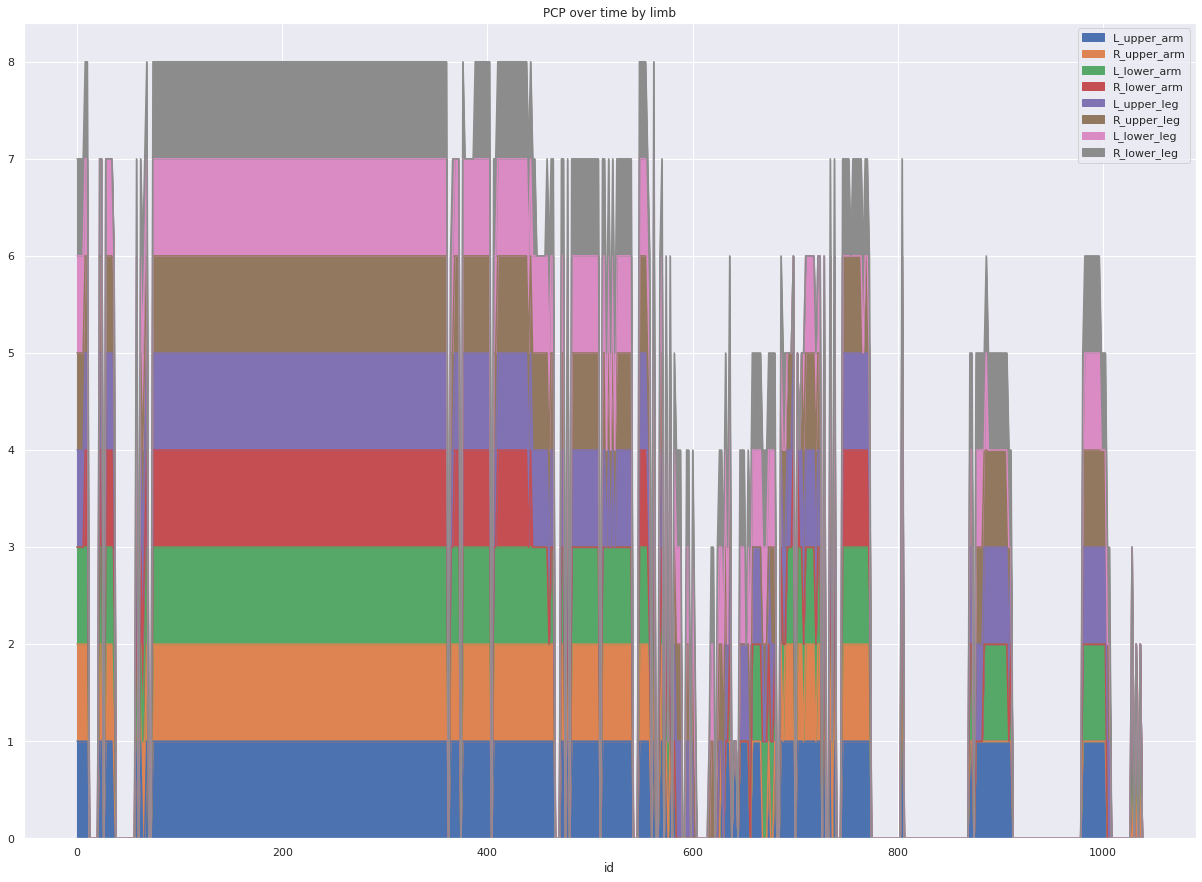

In [58]:
# by Frame
pd.DataFrame(pcp_df_scores).plot.area(title='PCP over time by limb')

In [1]:
# Update summary calcs!:
# 1) For frames where there is an output, how accurate is that output? (if entire row = 0, then exclude row in calculation)
# 2) Calculate number of detected frames (rows that have at least 1 value in threshold (row > 1))


# Tests with Modules

In [1]:
from tumeke_testing_modules import load_model_data, load_gt_data
from tumeke_testing_modules.visualize_frame import visualize_overlap
from tumeke_testing_modules.pck_calc import pck_calc
from tumeke_testing_modules.pcp_calc import pcp_calc

In [2]:
file = 'AFG_subject_switching_close_nurses_subjects1_partial'

hrnet_df, wrnch_df = load_model_data.get_hrnet_wrnch_dfs(file)
gt_df = load_gt_data.get_gt_df(file)

hrnet data loaded
wrnch data loaded
hrnet data formatted
hrnet_df shape: (2506, 76)
wrnch data formatted
wrnch_df shape: (2506, 76)
ground truth loaded and formatted
gt_df shape: (520, 54)



PCK - Percentage of Correct Key-points

Description: https://github.com/cbsudux/Human-Pose-Estimation-101#percentage-of-correct-parts---pcp

Percentage of Correct Key-points - PCK:

- Detected joint is considered correct if the distance between the predicted and 
      the true joint is within a certain threshold (threshold varies)
- PCKh@0.5 is when the threshold = 50% of the head bone link
- PCK@0.2 == Distance between predicted and true joint < 0.2 * torso diameter
- Sometimes 150 mm is taken as the threshold
- Head, shoulder, Elbow, Wrist, Hip, Knee, Ankle → Keypoints
- PCK is used for 2D and 3D (PCK3D)
- Higher the better
        
----------
hrnet
----------
hrnet | % Detected frames: 70.19%
hrnet | PCK - Total (all frames): 55.86%
hrnet | PCK - Total (detected frames): 79.58%
hrnet | PCK - By Body part (all frames):
Nose_ed          52.500000
L_Eye_ed         52.115385
R_Eye_ed         44.807692
L_Ear_ed         64.230769
R_Ear_ed         18.846154
L_Shoulder_ed    62.500000
R_S

/home/ubuntu/PoseEstimation/mmpose/tumeke_testing_modules/pck_calc.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_dist_df['{}_ed'.format(joint_order[j])] = vect_duclidean_dist(gt_df, df.iloc[gt_df.index], cols=[x,y])
/home/ubuntu/PoseEstimation/mmpose/tumeke_testing_modules/pck_calc.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_dist_df['{}_ed'.format(joint_order[j])] = vect_duclidean_dist(gt_df, df.iloc[gt_df.index], cols=[x,y])


wrnch | % Detected frames: 74.81%
wrnch | PCK - Total (all frames): 61.12%
wrnch | PCK - Total (detected frames): 81.70%
wrnch | PCK - By Body part (all frames):
Nose_ed          59.038462
L_Eye_ed         59.423077
R_Eye_ed         48.653846
L_Ear_ed         65.769231
R_Ear_ed         24.038462
L_Shoulder_ed    70.769231
R_Shoulder_ed    69.615385
L_Elbow_ed       69.807692
R_Elbow_ed       61.730769
L_Wrist_ed       68.653846
R_Wrist_ed       50.576923
L_Hip_ed         70.000000
R_Hip_ed         69.038462
L_Knee_ed        69.807692
R_Knee_ed        69.230769
L_Ankle_ed       51.730769
R_Ankle_ed       61.153846
dtype: float64
wrnch | PCK - By Body part (detected frames):
Nose_ed          78.920308
L_Eye_ed         79.434447
R_Eye_ed         65.038560
L_Ear_ed         87.917738
R_Ear_ed         32.133676
L_Shoulder_ed    94.601542
R_Shoulder_ed    93.059126
L_Elbow_ed       93.316195
R_Elbow_ed       82.519280
L_Wrist_ed       91.773779
R_Wrist_ed       67.609254
L_Hip_ed         93.5

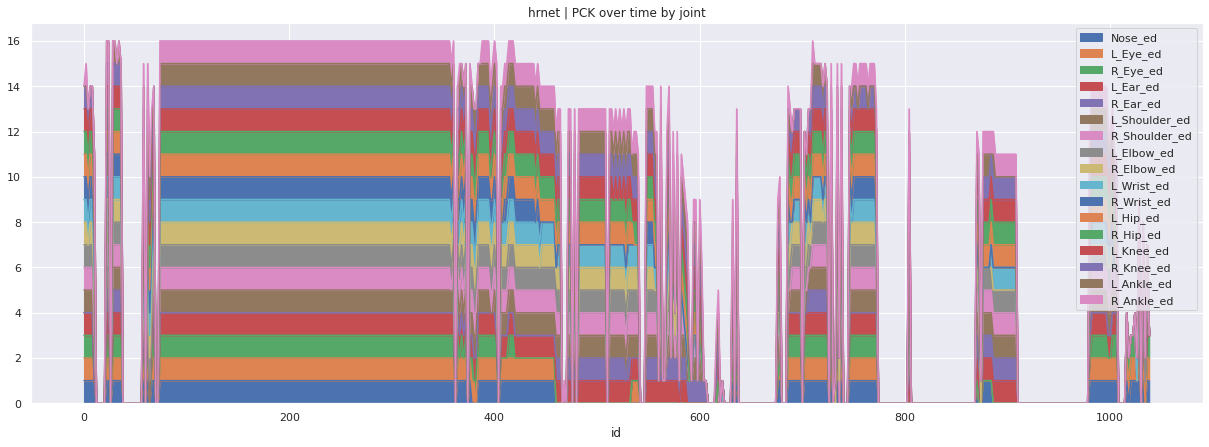

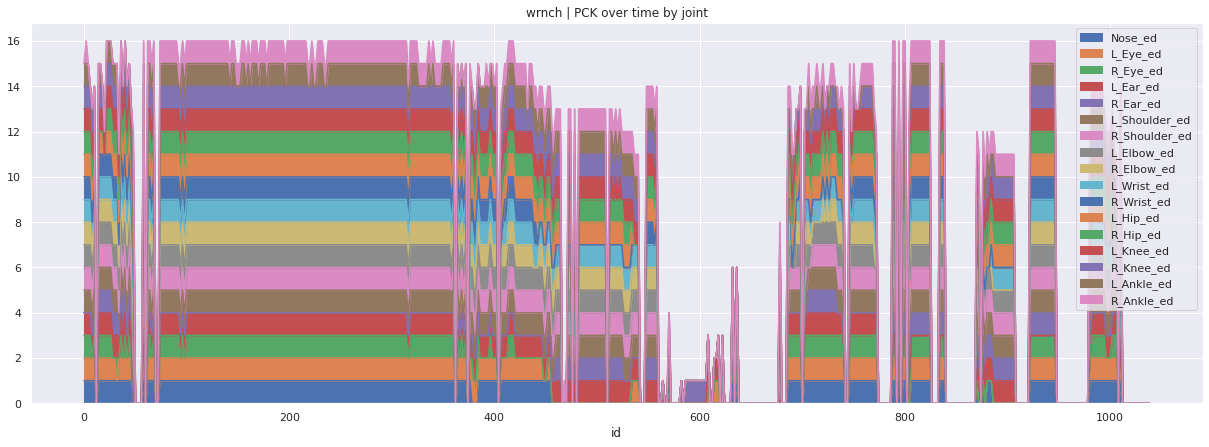

In [3]:
pck_calc(gt_df, hrnet_df, wrnch_df)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


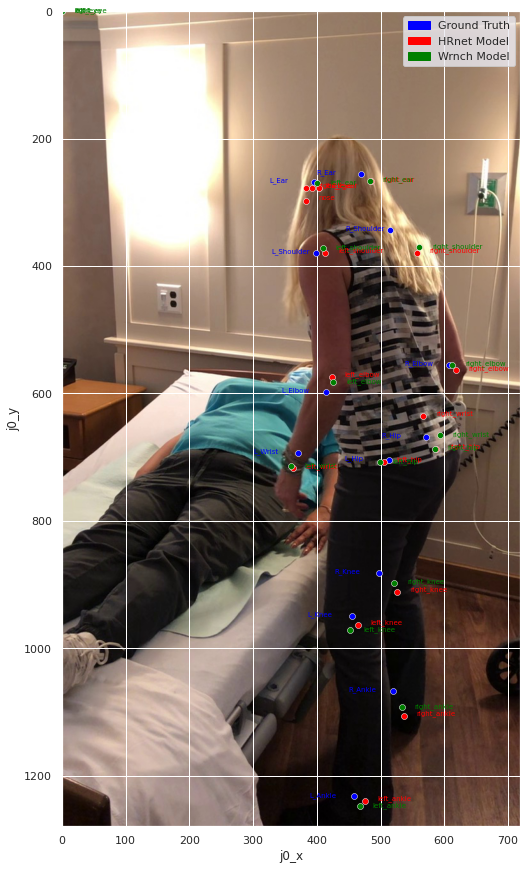

In [4]:
visualize_overlap(gt_df, hrnet_df, wrnch_df, 500)


PCP - Percentage of Correct Parts¶
https://github.com/cbsudux/Human-Pose-Estimation-101#percentage-of-correct-parts---pcp

Percentage of Correct Parts - PCP
- A limb is considered detected and a correct part if the distance between the two predicted joint locations and the 
   true limb joint locations is at most half of the limb length (PCP at 0.5 )

Measures detection rate of limbs

Cons - penalizes shorter limbs

Calculation:
- For a specific part, PCP = (No. of correct parts for entire dataset) / (No. of total parts for entire dataset)
- Take a dataset with 10 images and 1 pose per image. Each pose has 8 parts - ( upper arm, lower arm, upper leg, lower leg ) x2
- No of upper arms = 10 * 2 = 20
- No of lower arms = 20
- No of lower legs = No of upper legs = 20
- If upper arm is detected correct for 17 out of the 20 upper arms i.e 17 ( 10 right arms and 7 left) → PCP = 17/20 = 85%

Higher the better
        
----------
hrnet
----------
hrnet | % Detected frames: 70.77%
hrnet | PCP -

/home/ubuntu/PoseEstimation/mmpose/tumeke_testing_modules/pcp_calc.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_df.apply(lambda r: euclidean_dist(np.array([r[x1], r[y1]]), np.array([r[x2], r[y2]])), axis=1)
/home/ubuntu/PoseEstimation/mmpose/tumeke_testing_modules/pck_calc.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed_dist_df['{}_ed'.format(joint_order[j])] = vect_duclidean_dist(gt_df, df.iloc[gt_df.index], cols=[x,y])
/home/ubuntu/PoseEstimation/mmpose/tumeke_testing_modules/pcp_calc.p

wrnch | % Detected frames: 73.65%
wrnch | PCP - Total (all frames): 64.69%
wrnch | PCP - Total (detected frames): 87.83%
wrnch | PCP - By Limb (all frames):
L_upper_arm    71.538462
R_upper_arm    63.846154
L_lower_arm    70.576923
R_lower_arm    50.384615
L_upper_leg    70.769231
R_upper_leg    70.000000
L_lower_leg    58.269231
R_lower_leg    62.115385
dtype: float64
wrnch | PCP - By Limb (detected frames):
L_upper_arm    97.127937
R_upper_arm    86.684073
L_lower_arm    95.822454
R_lower_arm    68.407311
L_upper_leg    96.083551
R_upper_leg    95.039164
L_lower_leg    79.112272
R_lower_leg    84.334204
dtype: float64
wrnch | PCP - By Frame:


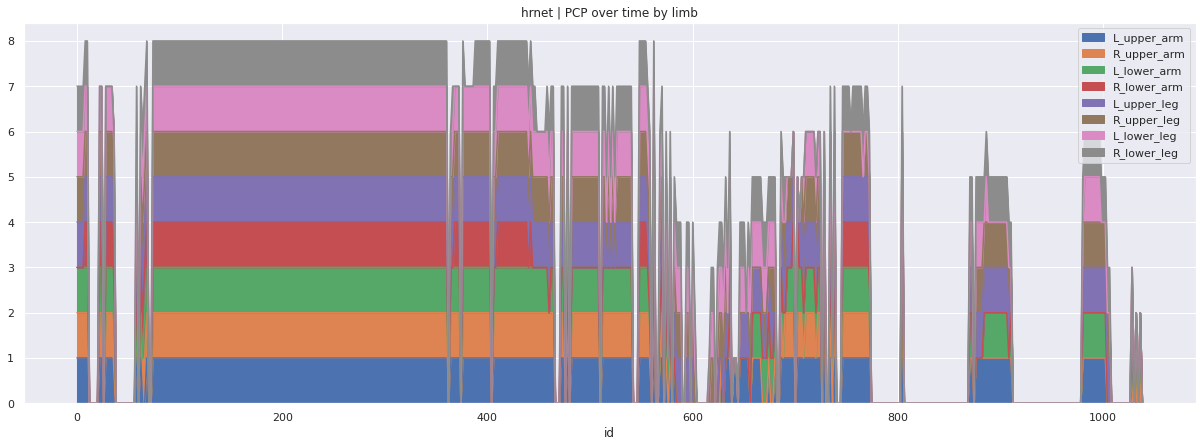

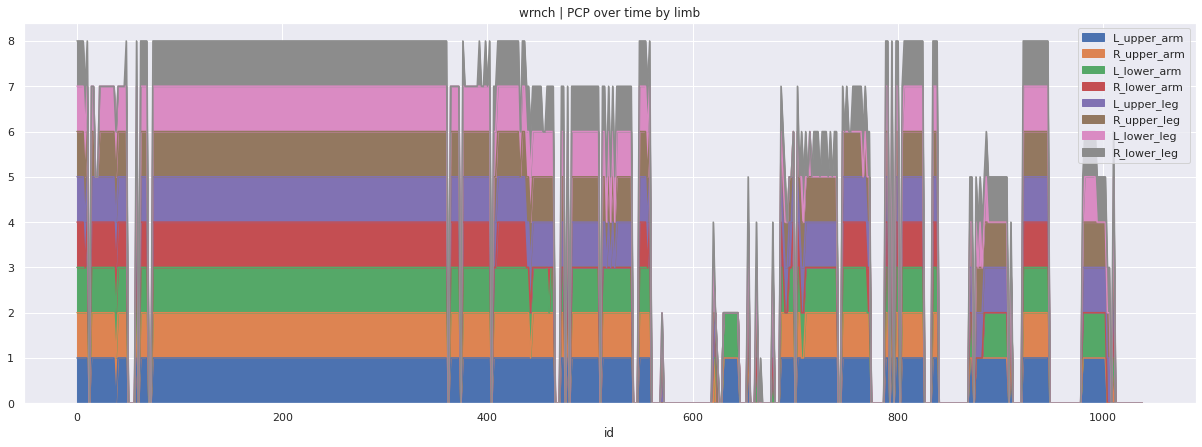

In [5]:
pcp_calc(gt_df, hrnet_df, wrnch_df)